In [12]:
pwd

'/Users/macbookpro/Dropbox/Galvanize/autoregression/testing'

In [13]:
import sys 
import os
import autoregression
from autoregression import cleandata, galgraphs
import importlib
import warnings
# warnings.filterwarnings('ignore')

# indians diabetes

## Continuous

In [34]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import auc, roc_curve
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pandas.read_csv(url, names=names)
array = df.values
df = cleandata.rename_columns(df)
df.head(3)
plt.rcParams.update({'figure.max_open_warning': 0})

In [35]:
df.iloc[2,7] = np.nan
df

preg  plas  pres  skin  test  mass   pedi   age  class
0       6   148    72    35     0  33.6  0.627  50.0      1
1       1    85    66    29     0  26.6  0.351  31.0      0
2       8   183    64     0     0  23.3  0.672   NaN      1
3       1    89    66    23    94  28.1  0.167  21.0      0
4       0   137    40    35   168  43.1  2.288  33.0      1
5       5   116    74     0     0  25.6  0.201  30.0      0
6       3    78    50    32    88  31.0  0.248  26.0      1
7      10   115     0     0     0  35.3  0.134  29.0      0
8       2   197    70    45   543  30.5  0.158  53.0      1
9       8   125    96     0     0   0.0  0.232  54.0      1
10      4   110    92     0     0  37.6  0.191  30.0      0
11     10   168    74     0     0  38.0  0.537  34.0      1
12     10   139    80     0     0  27.1  1.441  57.0      0
13      1   189    60    23   846  30.1  0.398  59.0      1
14      5   166    72    19   175  25.8  0.587  51.0      1
15      7   100     0     0     0  30.0  0.484  32.0      1
16      0   118    84    47   230  45.8  0.551  31.0      1
17      7   107    74     0     0  29.6  0.254  31.0      1
18      1   103    30    38    83  43.3  0.183  33.0      0
19      1   115    70    30    96  34.6  0.529  32.0      1
20      3   126    88    41   235  39.3  0.704  27.0      0
21      8    99    84     0     0  35.4  0.388  50.0      0
22      7   196    90     0     0  39.8  0.451  41.0      1
23      9   119    80    35     0  29.0  0.263  29.0      1
24     11   143    94    33   146  36.6  0.254  51.0      1
25     10   125    70    26   115  31.1  0.205  41.0      1
26      7   147    76     0     0  39.4  0.257  43.0      1
27      1    97    66    15   140  23.2  0.487  22.0      0
28     13   145    82    19   110  22.2  0.245  57.0      0
29      5   117    92     0     0  34.1  0.337  38.0      0
..    ...   ...   ...   ...   ...   ...    ...   ...    ...
738     2    99    60    17   160  36.6  0.453  21.0      0
739     1   102    74     0     0  39.5  0.293  42.0      1
740    11   120    80    37   150  42.3  0.785  48.0      1
741     3   102    44    20    94  30.8  0.400  26.0      0
742     1   109    58    18   116  28.5  0.219  22.0      0
743     9   140    94     0     0  32.7  0.734  45.0      1
744    13   153    88    37   140  40.6  1.174  39.0      0
745    12   100    84    33   105  30.0  0.488  46.0      0
746     1   147    94    41     0  49.3  0.358  27.0      1
747     1    81    74    41    57  46.3  1.096  32.0      0
748     3   187    70    22   200  36.4  0.408  36.0      1
749     6   162    62     0     0  24.3  0.178  50.0      1
750     4   136    70     0     0  31.2  1.182  22.0      1
751     1   121    78    39    74  39.0  0.261  28.0      0
752     3   108    62    24     0  26.0  0.223  25.0      0
753     0   181    88    44   510  43.3  0.222  26.0      1
754     8   154    78    32     0  32.4  0.443  45.0      1
755     1   128    88    39   110  36.5  1.057  37.0      1
756     7   137    90    41     0  32.0  0.391  39.0      0
757     0   123    72     0     0  36.3  0.258  52.0      1
758     1   106    76     0     0  37.5  0.197  26.0      0
759     6   190    92     0     0  35.5  0.278  66.0      1
760     2    88    58    26    16  28.4  0.766  22.0      0
761     9   170    74    31     0  44.0  0.403  43.0      1
762     9    89    62     0     0  22.5  0.142  33.0      0
763    10   101    76    48   180  32.9  0.171  63.0      0
764     2   122    70    27     0  36.8  0.340  27.0      0
765     5   121    72    23   112  26.2  0.245  30.0      0
766     1   126    60     0     0  30.1  0.349  47.0      1
767     1    93    70    31     0  30.4  0.315  23.0      0

[768 rows x 9 columns]

In [40]:
df.iloc[3,3] = np.nan
df

preg  plas  pres  skin  test  mass   pedi   age  class
0       6   148    72  35.0     0  33.6  0.627  50.0      1
1       1    85    66  29.0     0  26.6  0.351  31.0      0
3       1    89    66   NaN    94  28.1  0.167  21.0      0
4       0   137    40   NaN   168  43.1  2.288  33.0      1
5       5   116    74   0.0     0  25.6  0.201  30.0      0
6       3    78    50  32.0    88  31.0  0.248  26.0      1
7      10   115     0   0.0     0  35.3  0.134  29.0      0
8       2   197    70  45.0   543  30.5  0.158  53.0      1
9       8   125    96   0.0     0   0.0  0.232  54.0      1
10      4   110    92   0.0     0  37.6  0.191  30.0      0
11     10   168    74   0.0     0  38.0  0.537  34.0      1
12     10   139    80   0.0     0  27.1  1.441  57.0      0
13      1   189    60  23.0   846  30.1  0.398  59.0      1
14      5   166    72  19.0   175  25.8  0.587  51.0      1
15      7   100     0   0.0     0  30.0  0.484  32.0      1
16      0   118    84  47.0   230  45.8  0.551  31.0      1
17      7   107    74   0.0     0  29.6  0.254  31.0      1
18      1   103    30  38.0    83  43.3  0.183  33.0      0
19      1   115    70  30.0    96  34.6  0.529  32.0      1
20      3   126    88  41.0   235  39.3  0.704  27.0      0
21      8    99    84   0.0     0  35.4  0.388  50.0      0
22      7   196    90   0.0     0  39.8  0.451  41.0      1
23      9   119    80  35.0     0  29.0  0.263  29.0      1
24     11   143    94  33.0   146  36.6  0.254  51.0      1
25     10   125    70  26.0   115  31.1  0.205  41.0      1
26      7   147    76   0.0     0  39.4  0.257  43.0      1
27      1    97    66  15.0   140  23.2  0.487  22.0      0
28     13   145    82  19.0   110  22.2  0.245  57.0      0
29      5   117    92   0.0     0  34.1  0.337  38.0      0
30      5   109    75  26.0     0  36.0  0.546  60.0      0
..    ...   ...   ...   ...   ...   ...    ...   ...    ...
738     2    99    60  17.0   160  36.6  0.453  21.0      0
739     1   102    74   0.0     0  39.5  0.293  42.0      1
740    11   120    80  37.0   150  42.3  0.785  48.0      1
741     3   102    44  20.0    94  30.8  0.400  26.0      0
742     1   109    58  18.0   116  28.5  0.219  22.0      0
743     9   140    94   0.0     0  32.7  0.734  45.0      1
744    13   153    88  37.0   140  40.6  1.174  39.0      0
745    12   100    84  33.0   105  30.0  0.488  46.0      0
746     1   147    94  41.0     0  49.3  0.358  27.0      1
747     1    81    74  41.0    57  46.3  1.096  32.0      0
748     3   187    70  22.0   200  36.4  0.408  36.0      1
749     6   162    62   0.0     0  24.3  0.178  50.0      1
750     4   136    70   0.0     0  31.2  1.182  22.0      1
751     1   121    78  39.0    74  39.0  0.261  28.0      0
752     3   108    62  24.0     0  26.0  0.223  25.0      0
753     0   181    88  44.0   510  43.3  0.222  26.0      1
754     8   154    78  32.0     0  32.4  0.443  45.0      1
755     1   128    88  39.0   110  36.5  1.057  37.0      1
756     7   137    90  41.0     0  32.0  0.391  39.0      0
757     0   123    72   0.0     0  36.3  0.258  52.0      1
758     1   106    76   0.0     0  37.5  0.197  26.0      0
759     6   190    92   0.0     0  35.5  0.278  66.0      1
760     2    88    58  26.0    16  28.4  0.766  22.0      0
761     9   170    74  31.0     0  44.0  0.403  43.0      1
762     9    89    62   0.0     0  22.5  0.142  33.0      0
763    10   101    76  48.0   180  32.9  0.171  63.0      0
764     2   122    70  27.0     0  36.8  0.340  27.0      0
765     5   121    72  23.0   112  26.2  0.245  30.0      0
766     1   126    60   0.0     0  30.1  0.349  47.0      1
767     1    93    70  31.0     0  30.4  0.315  23.0      0

[767 rows x 9 columns]

In [41]:
df = df[~df.age.map(np.isnan)]
df

preg  plas  pres  skin  test  mass   pedi   age  class
0       6   148    72  35.0     0  33.6  0.627  50.0      1
1       1    85    66  29.0     0  26.6  0.351  31.0      0
3       1    89    66   NaN    94  28.1  0.167  21.0      0
4       0   137    40   NaN   168  43.1  2.288  33.0      1
5       5   116    74   0.0     0  25.6  0.201  30.0      0
6       3    78    50  32.0    88  31.0  0.248  26.0      1
7      10   115     0   0.0     0  35.3  0.134  29.0      0
8       2   197    70  45.0   543  30.5  0.158  53.0      1
9       8   125    96   0.0     0   0.0  0.232  54.0      1
10      4   110    92   0.0     0  37.6  0.191  30.0      0
11     10   168    74   0.0     0  38.0  0.537  34.0      1
12     10   139    80   0.0     0  27.1  1.441  57.0      0
13      1   189    60  23.0   846  30.1  0.398  59.0      1
14      5   166    72  19.0   175  25.8  0.587  51.0      1
15      7   100     0   0.0     0  30.0  0.484  32.0      1
16      0   118    84  47.0   230  45.8  0.551  31.0      1
17      7   107    74   0.0     0  29.6  0.254  31.0      1
18      1   103    30  38.0    83  43.3  0.183  33.0      0
19      1   115    70  30.0    96  34.6  0.529  32.0      1
20      3   126    88  41.0   235  39.3  0.704  27.0      0
21      8    99    84   0.0     0  35.4  0.388  50.0      0
22      7   196    90   0.0     0  39.8  0.451  41.0      1
23      9   119    80  35.0     0  29.0  0.263  29.0      1
24     11   143    94  33.0   146  36.6  0.254  51.0      1
25     10   125    70  26.0   115  31.1  0.205  41.0      1
26      7   147    76   0.0     0  39.4  0.257  43.0      1
27      1    97    66  15.0   140  23.2  0.487  22.0      0
28     13   145    82  19.0   110  22.2  0.245  57.0      0
29      5   117    92   0.0     0  34.1  0.337  38.0      0
30      5   109    75  26.0     0  36.0  0.546  60.0      0
..    ...   ...   ...   ...   ...   ...    ...   ...    ...
738     2    99    60  17.0   160  36.6  0.453  21.0      0
739     1   102    74   0.0     0  39.5  0.293  42.0      1
740    11   120    80  37.0   150  42.3  0.785  48.0      1
741     3   102    44  20.0    94  30.8  0.400  26.0      0
742     1   109    58  18.0   116  28.5  0.219  22.0      0
743     9   140    94   0.0     0  32.7  0.734  45.0      1
744    13   153    88  37.0   140  40.6  1.174  39.0      0
745    12   100    84  33.0   105  30.0  0.488  46.0      0
746     1   147    94  41.0     0  49.3  0.358  27.0      1
747     1    81    74  41.0    57  46.3  1.096  32.0      0
748     3   187    70  22.0   200  36.4  0.408  36.0      1
749     6   162    62   0.0     0  24.3  0.178  50.0      1
750     4   136    70   0.0     0  31.2  1.182  22.0      1
751     1   121    78  39.0    74  39.0  0.261  28.0      0
752     3   108    62  24.0     0  26.0  0.223  25.0      0
753     0   181    88  44.0   510  43.3  0.222  26.0      1
754     8   154    78  32.0     0  32.4  0.443  45.0      1
755     1   128    88  39.0   110  36.5  1.057  37.0      1
756     7   137    90  41.0     0  32.0  0.391  39.0      0
757     0   123    72   0.0     0  36.3  0.258  52.0      1
758     1   106    76   0.0     0  37.5  0.197  26.0      0
759     6   190    92   0.0     0  35.5  0.278  66.0      1
760     2    88    58  26.0    16  28.4  0.766  22.0      0
761     9   170    74  31.0     0  44.0  0.403  43.0      1
762     9    89    62   0.0     0  22.5  0.142  33.0      0
763    10   101    76  48.0   180  32.9  0.171  63.0      0
764     2   122    70  27.0     0  36.8  0.340  27.0      0
765     5   121    72  23.0   112  26.2  0.245  30.0      0
766     1   126    60   0.0     0  30.1  0.349  47.0      1
767     1    93    70  31.0     0  30.4  0.315  23.0      0

[767 rows x 9 columns]

Running: TAKE_SUBSAMPLE ...
TAKE_SUBSAMPLE TIME: 7.867813110351562e-06
Running: CLEAN_DF ...
CLEAN_DF TIME: 0.023236751556396484
Running: MATSHOW ...
MATSHOW TIME: 0.014555931091308594
Running: PLOT_SCATTER_MATRIX ...


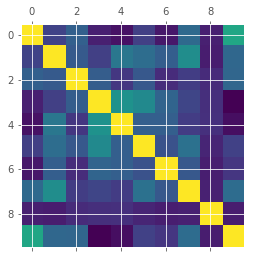

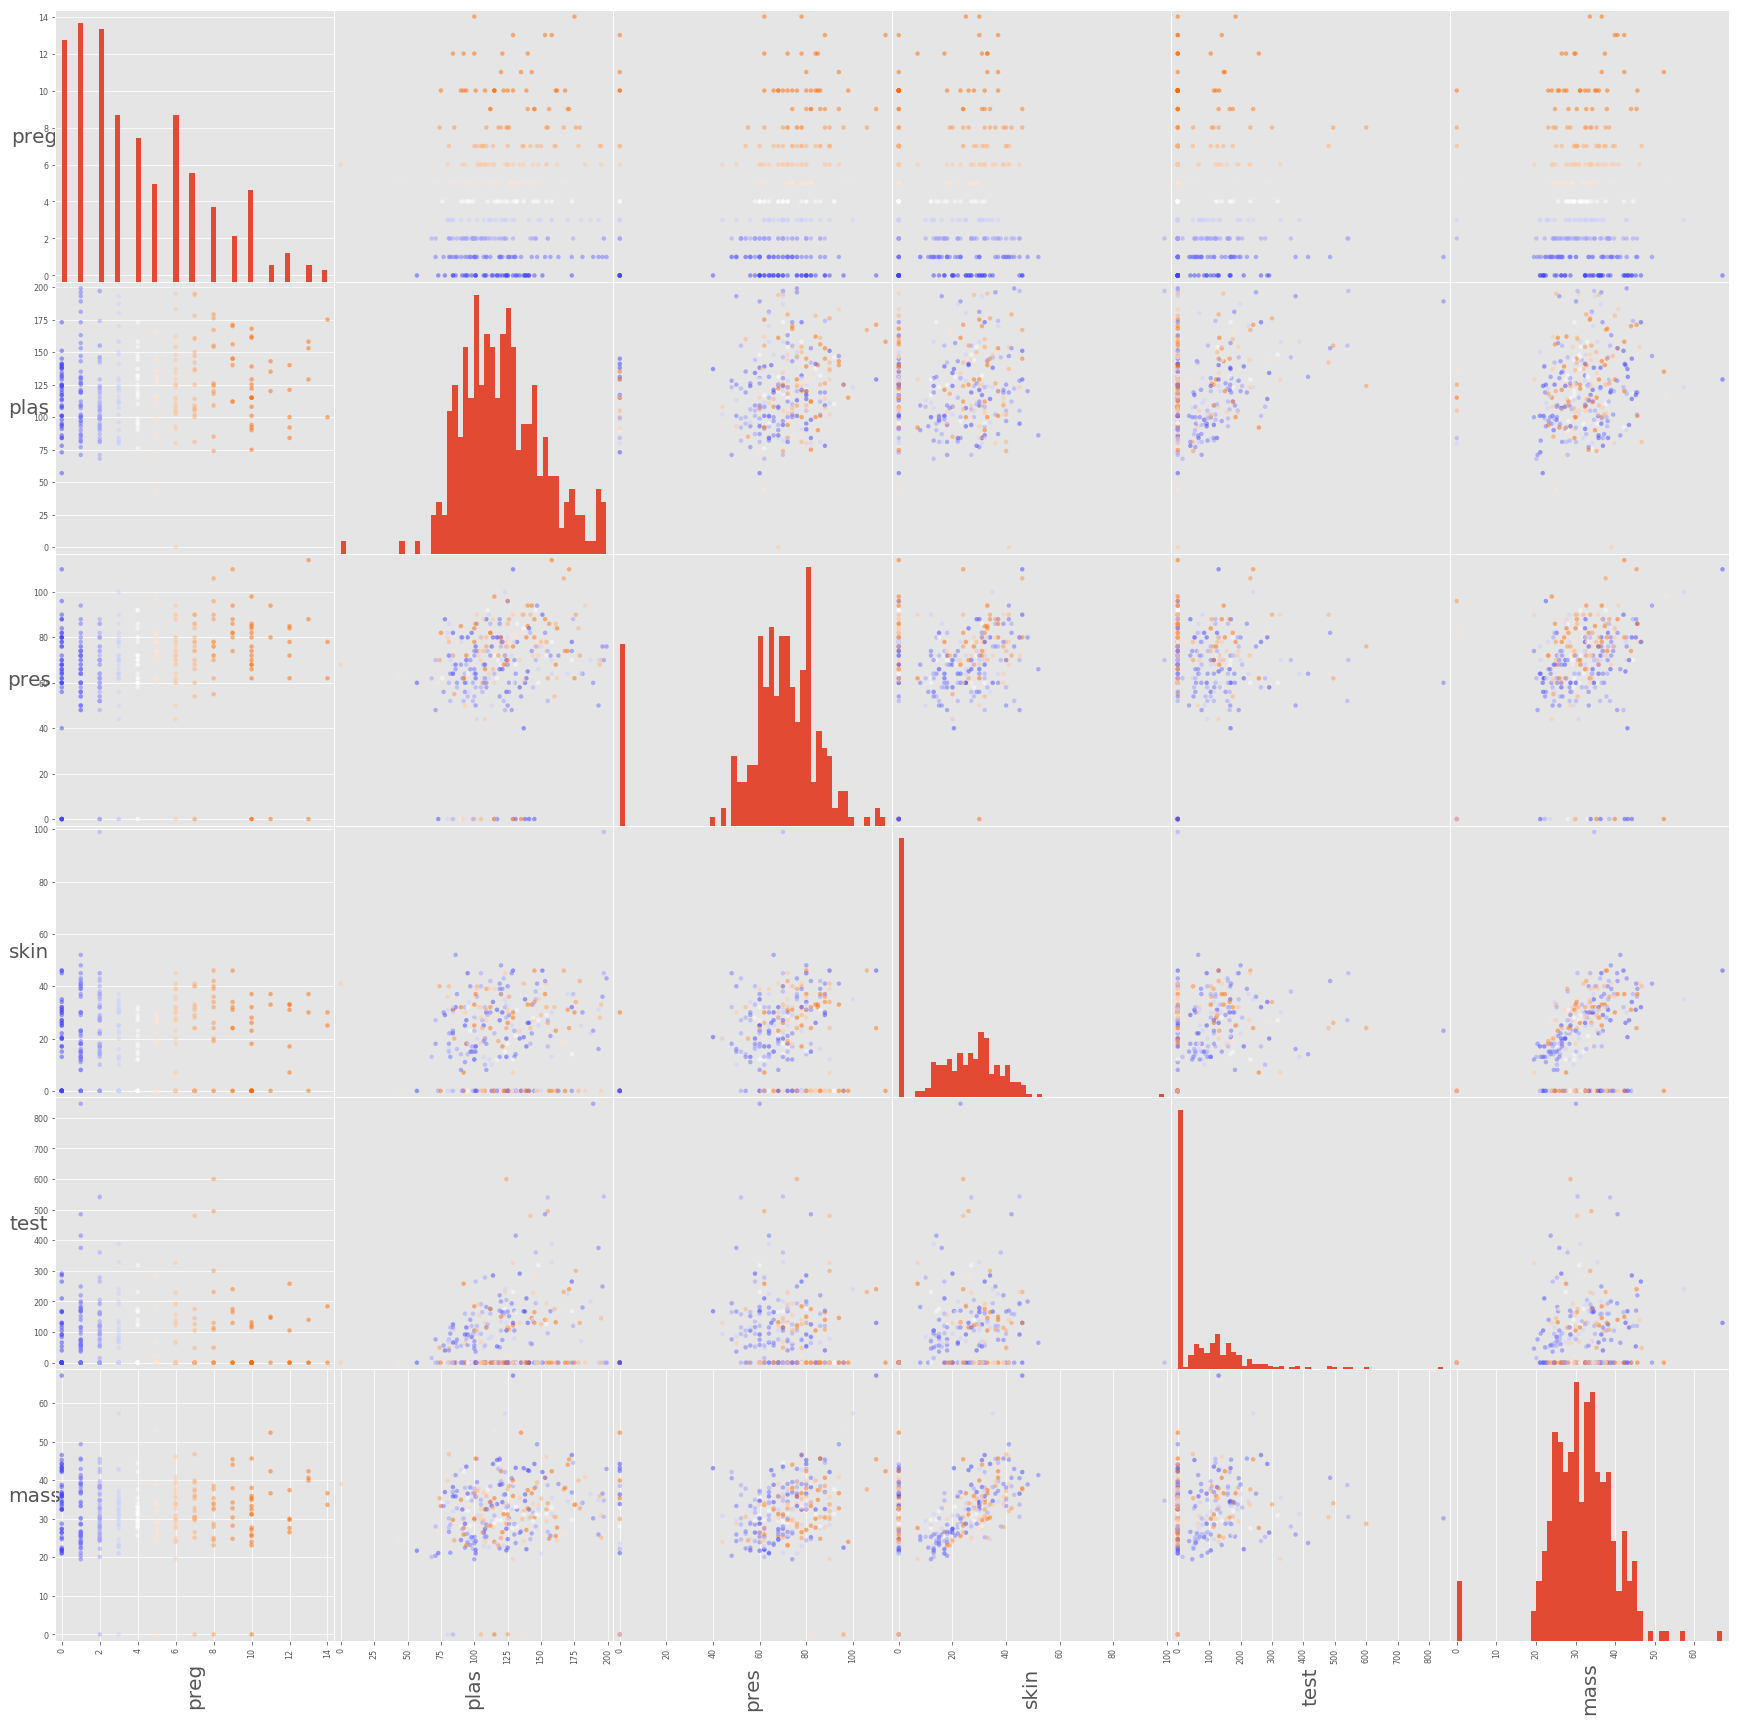

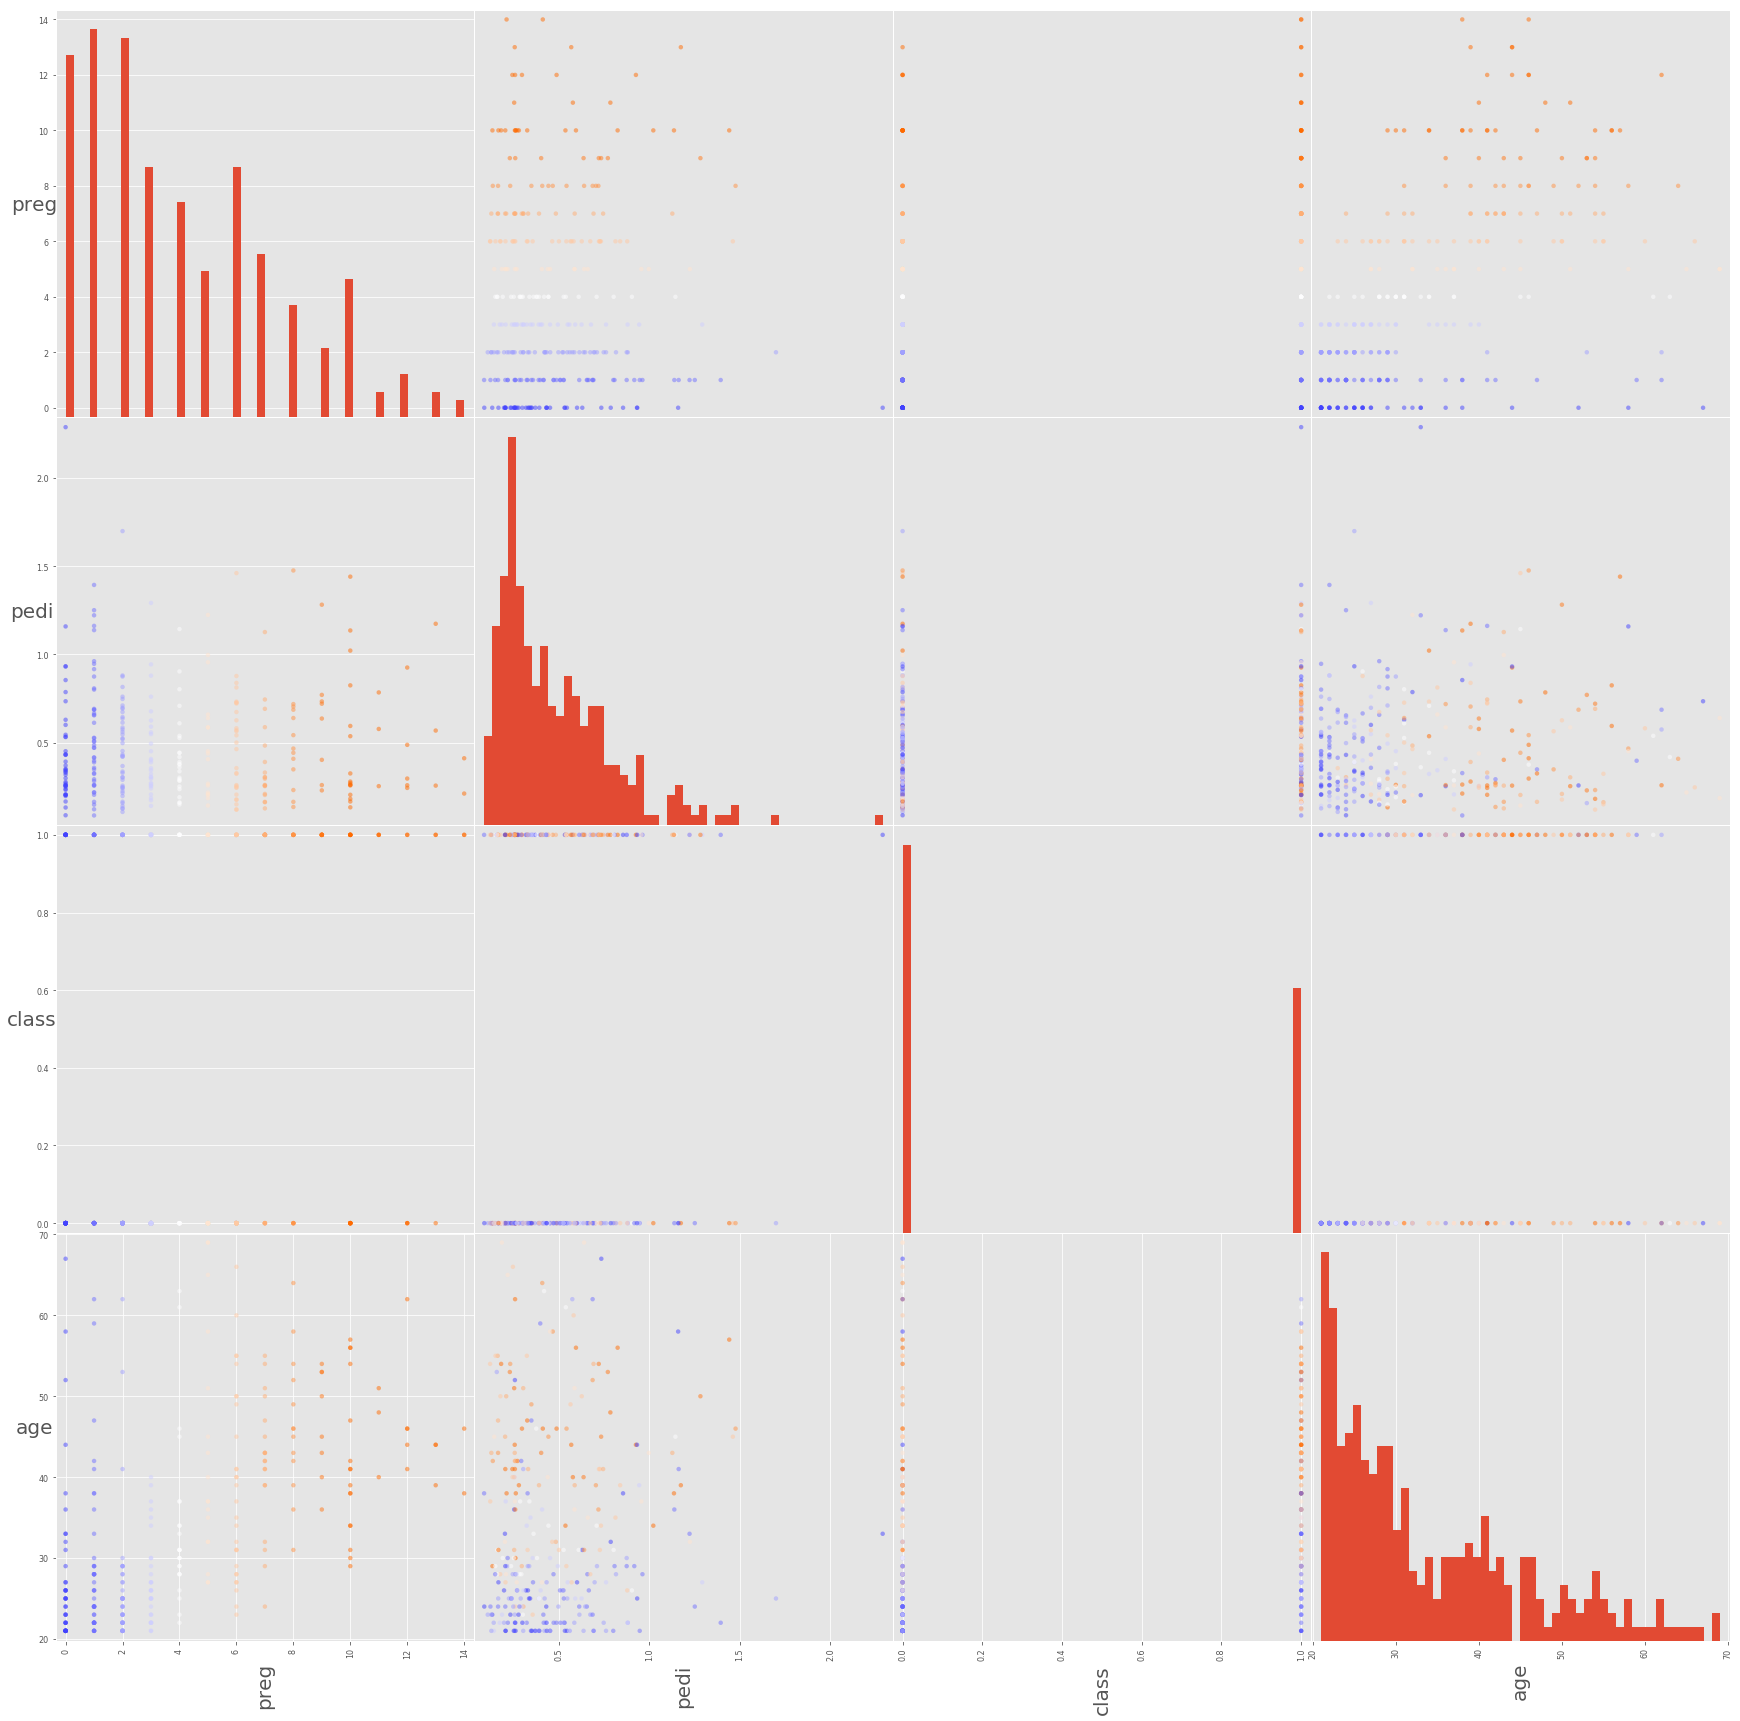

PLOT_SCATTER_MATRIX TIME: 8.39552116394043
DF COLUMNS: 
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'class', 'skin_was_null', 'age']

DF COLUMNS AFTER TRANSFORM: 
['preg_spline_linear', 'preg_spline_0', 'preg_spline_1', 'preg_spline_2', 'plas_spline_linear', 'plas_spline_0', 'plas_spline_1', 'plas_spline_2', 'pres_spline_linear', 'pres_spline_0', 'pres_spline_1', 'pres_spline_2', 'skin_spline_linear', 'skin_spline_0', 'skin_spline_1', 'skin_spline_2', 'test_spline_linear', 'test_spline_0', 'test_spline_1', 'test_spline_2', 'mass_spline_linear', 'mass_spline_0', 'mass_spline_1', 'mass_spline_2', 'pedi_spline_linear', 'pedi_spline_0', 'pedi_spline_1', 'pedi_spline_2', 'class_spline_linear', 'class_spline_0', 'class_spline_1', 'class_spline_2', 'skin_was_null_False_category', 'skin_was_null_True_category', 'age']

52
Y VARIABLE: "age" IS CONTINUOUS



29it [00:19,  1.50it/s]


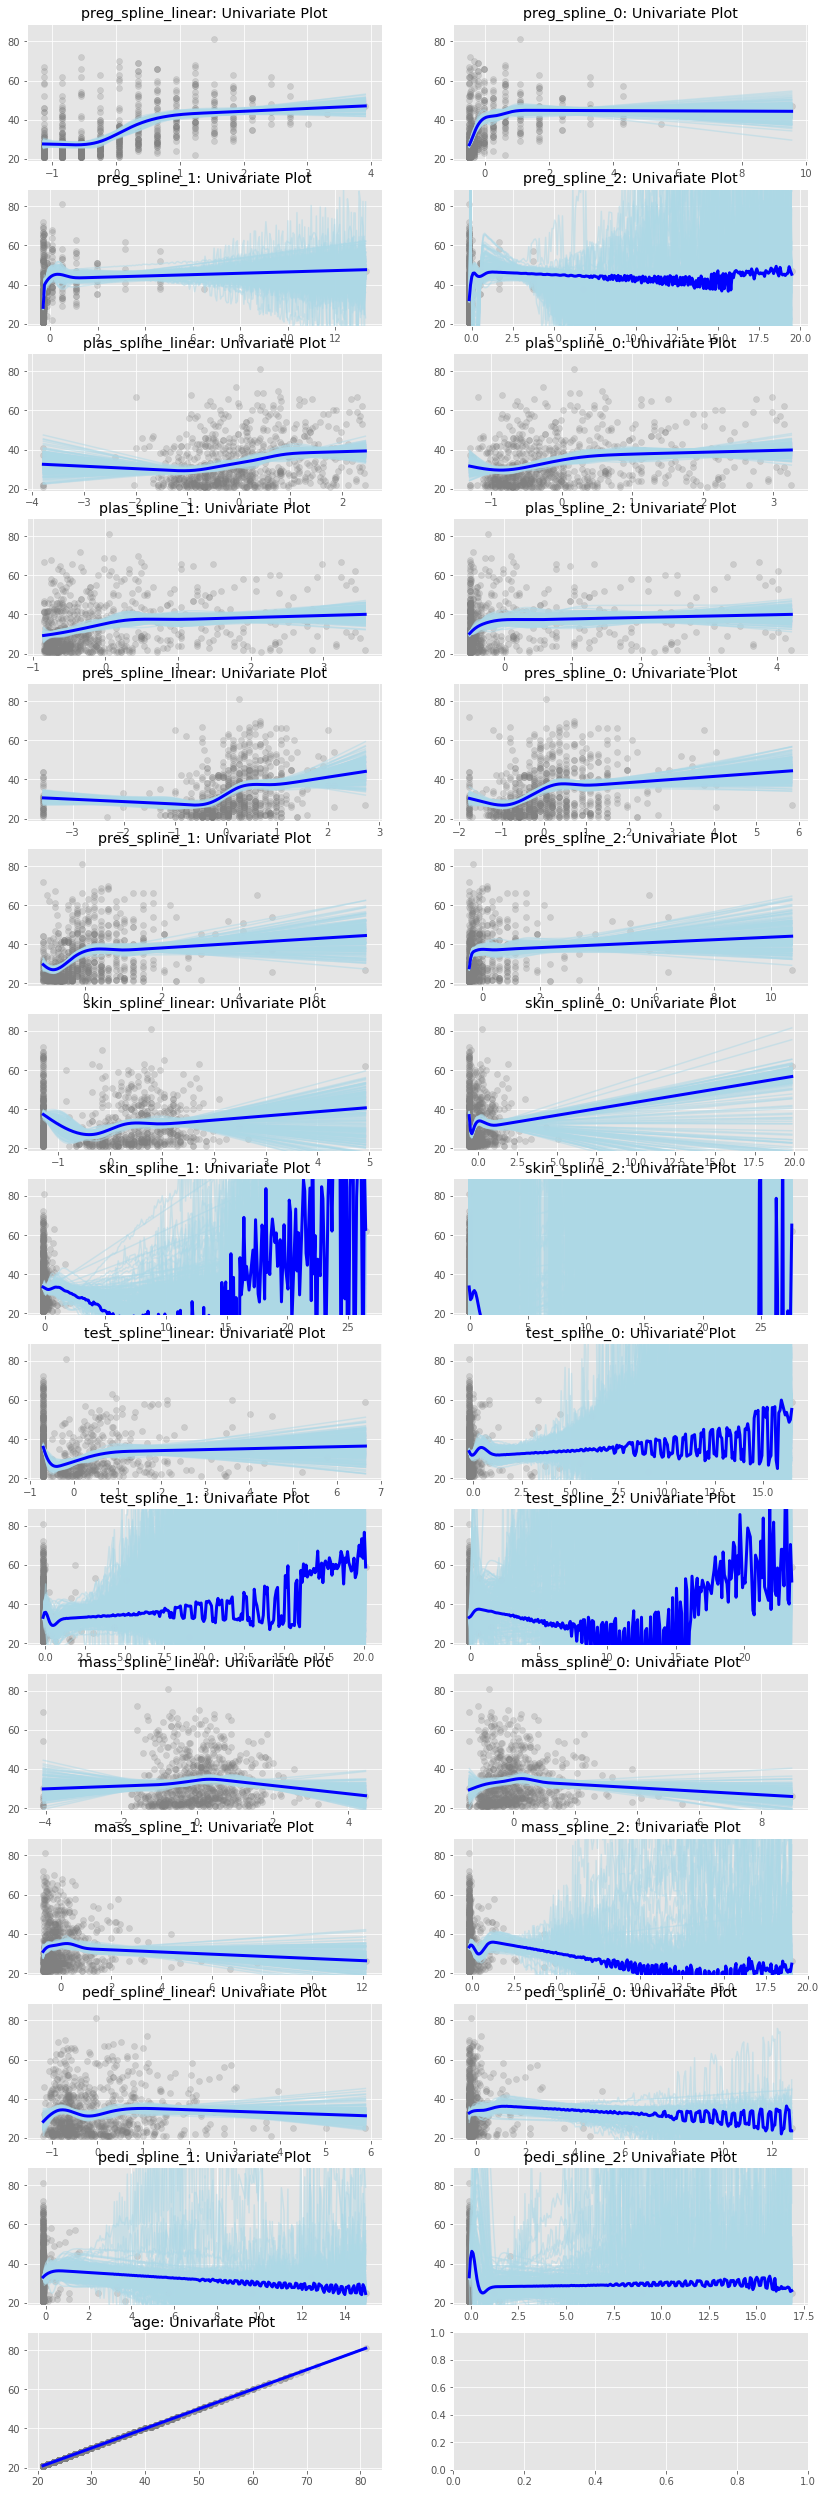

  0%|          | 0/5 [00:00<?, ?it/s]

Running: PLOT_CHOOSE_ALPHA ...
PLOT_CHOOSE_ALPHA TIME: 1.4824528694152832
RR: mean=-85.327476 std=15.617598
Running: PLOT_PREDICTED_VS_ACTUALS ...
PLOT_PREDICTED_VS_ACTUALS TIME: 0.03687715530395508


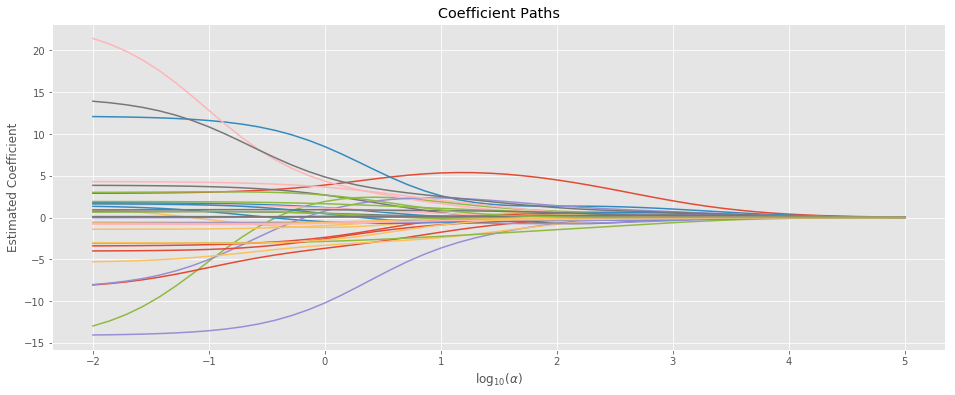

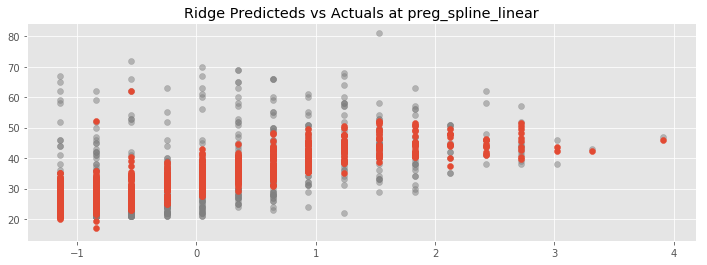

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [42]:
names1, results1, models1, pipeline1, df_X1 = autoregression.compare_predictions(df,'age') # , univariates=False)

## Categorical

In [16]:
# df.loc[df['class']==1,'class'] = "Class1"

In [17]:
# df.loc[df['class']==0,'class'] = "Class2"

In [18]:
df['class'] = (df['class']==1)

Running: TAKE_SUBSAMPLE ...
TAKE_SUBSAMPLE TIME: 5.245208740234375e-06
Running: CLEAN_DF ...
CLEAN_DF TIME: 0.016906261444091797
Running: MATSHOW ...
MATSHOW TIME: 0.013032197952270508
Running: PLOT_SCATTER_MATRIX ...


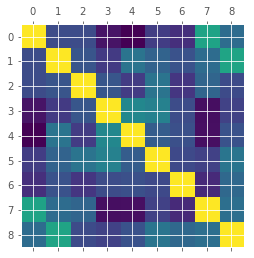

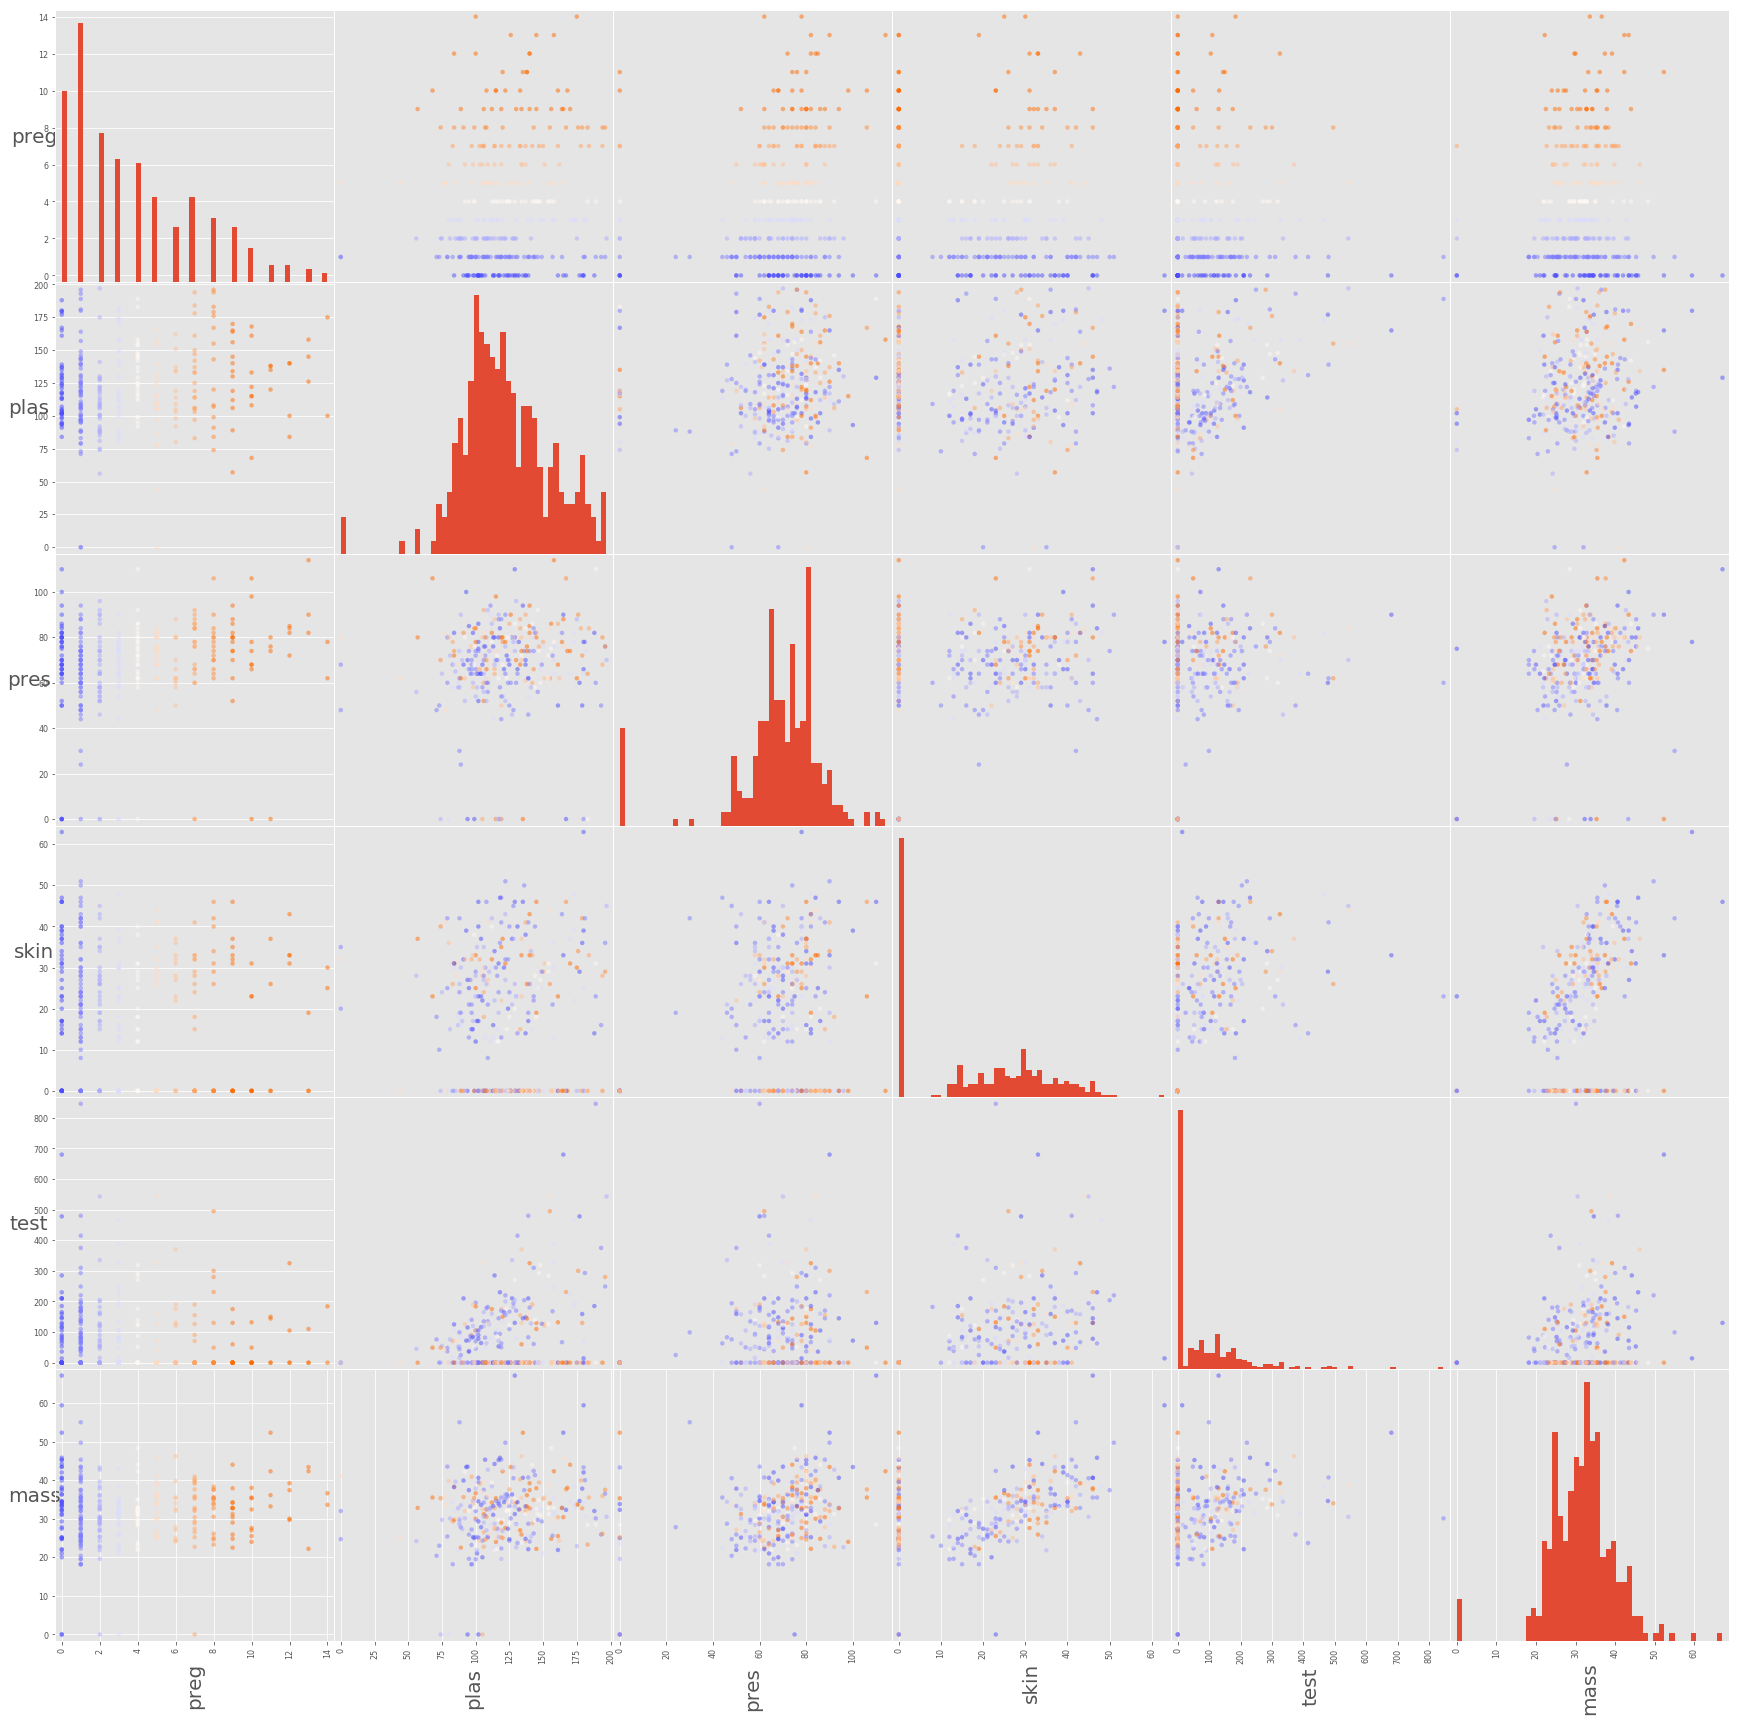

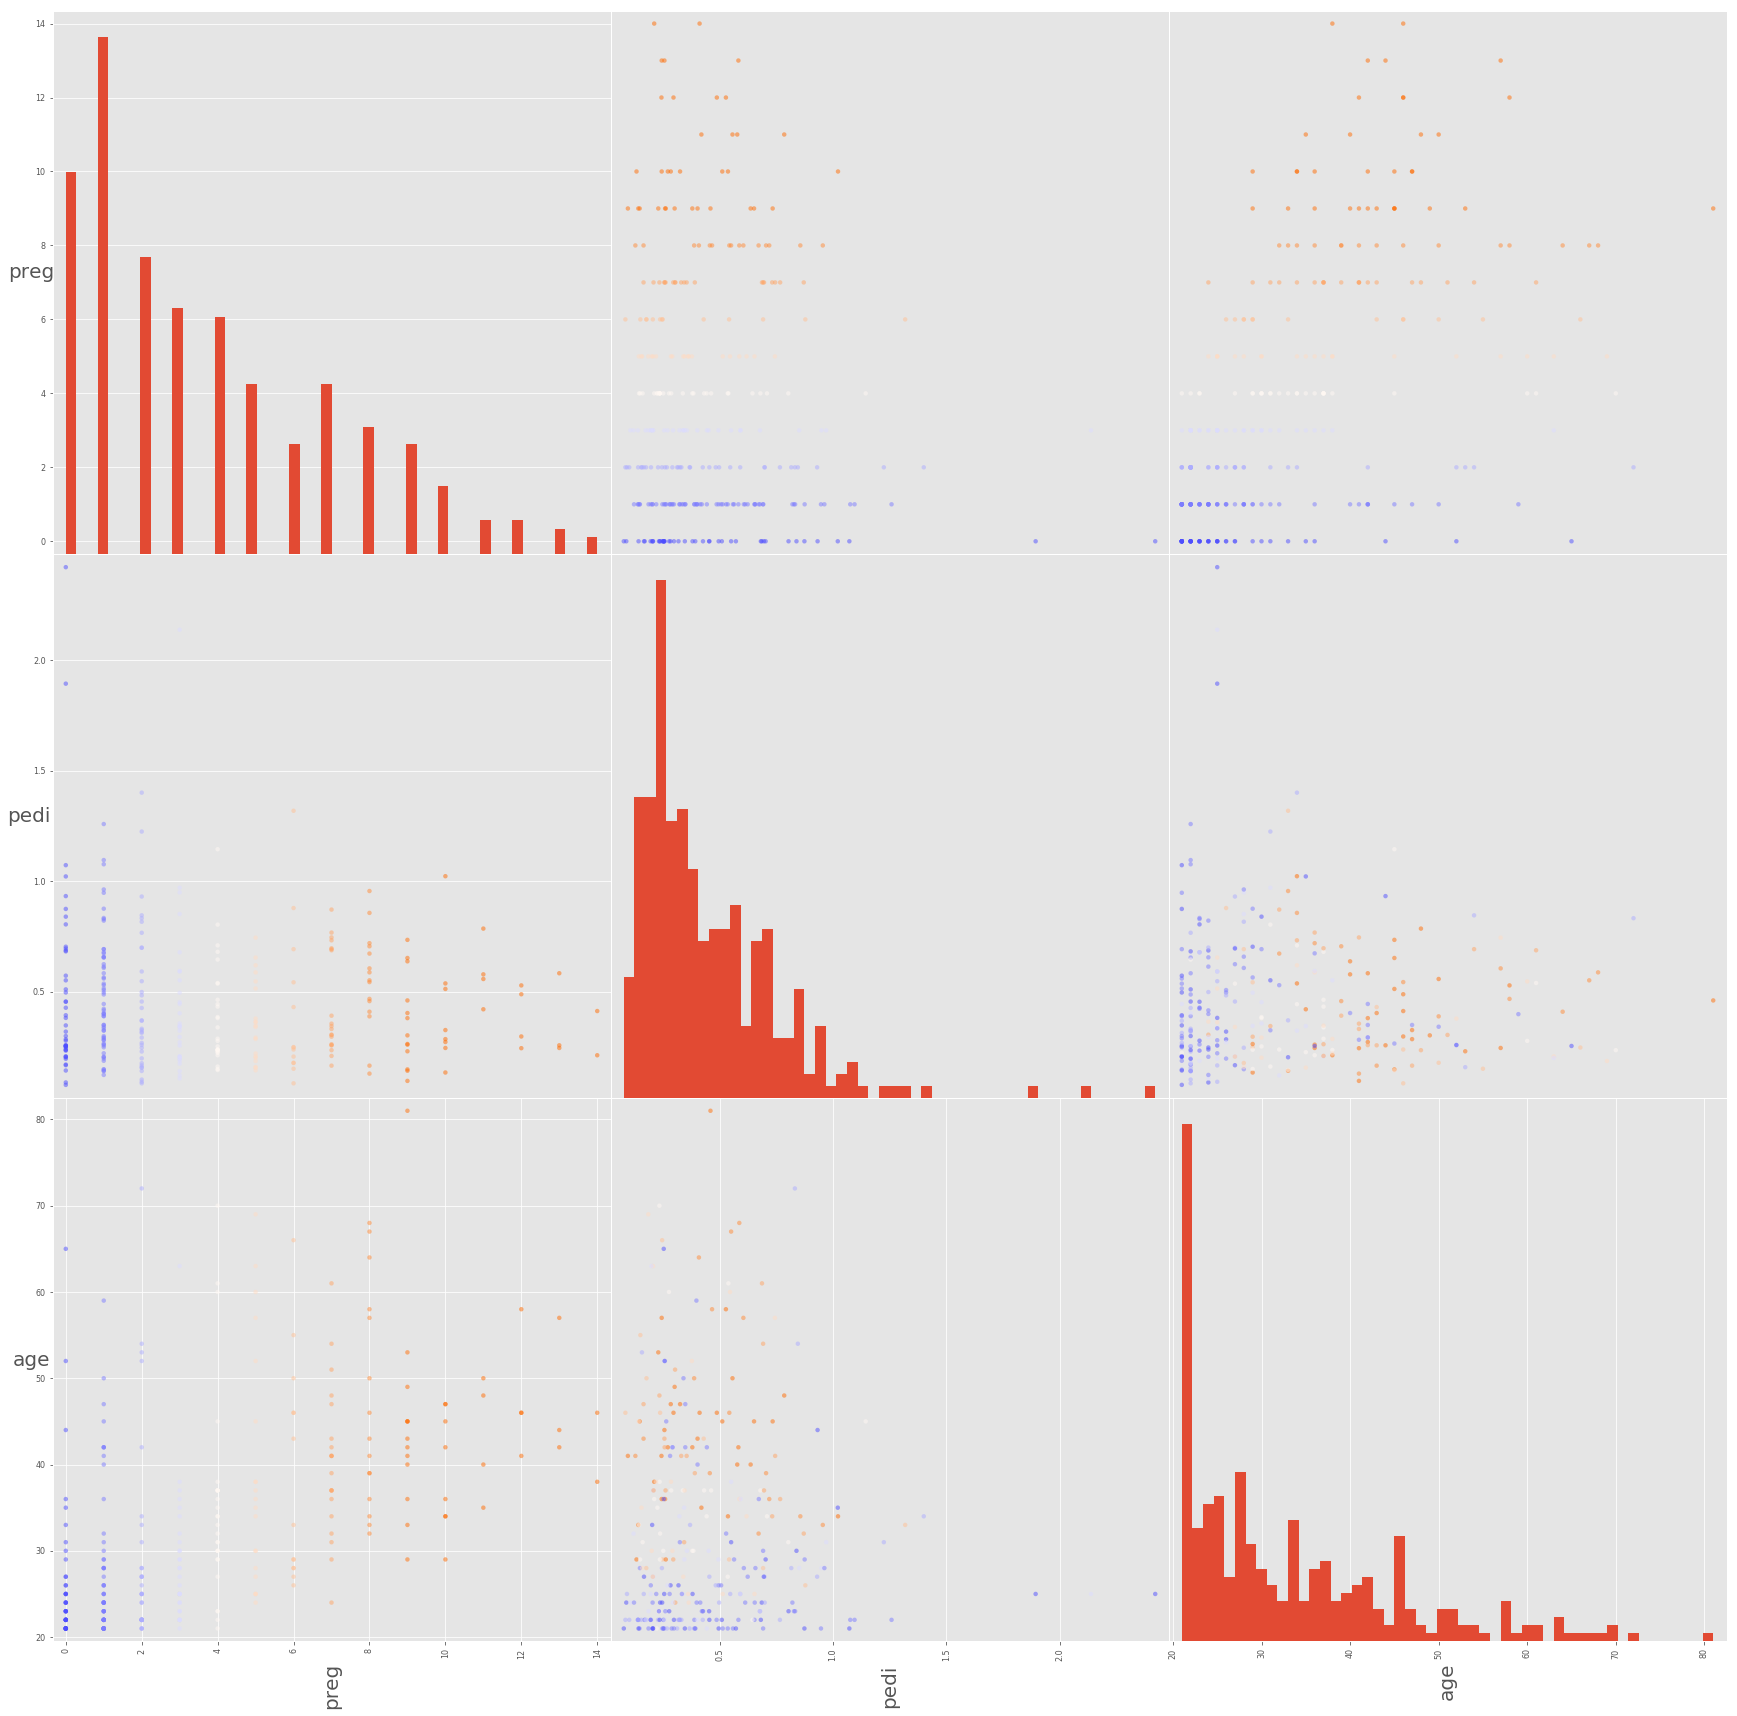

  0%|          | 0/6 [00:00<?, ?it/s]

PLOT_SCATTER_MATRIX TIME: 8.78876805305481
DF COLUMNS: 
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

DF COLUMNS AFTER TRANSFORM: 
['preg_spline_linear', 'preg_spline_0', 'preg_spline_1', 'preg_spline_2', 'plas_spline_linear', 'plas_spline_0', 'plas_spline_1', 'plas_spline_2', 'pres_spline_linear', 'pres_spline_0', 'pres_spline_1', 'pres_spline_2', 'skin_spline_linear', 'skin_spline_0', 'skin_spline_1', 'skin_spline_2', 'test_spline_linear', 'test_spline_0', 'test_spline_1', 'test_spline_2', 'mass_spline_linear', 'mass_spline_0', 'mass_spline_1', 'mass_spline_2', 'pedi_spline_linear', 'pedi_spline_0', 'pedi_spline_1', 'pedi_spline_2', 'age_spline_linear', 'age_spline_0', 'age_spline_1', 'age_spline_2', 'class']

2
Y VARIABLE: "class" IS CATEGORICAL

Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 0.08235788345336914
LR: mean=0.765619 std=0.058162
Running: PLOT_COEFS ...
PLOT_COEFS TIME: 0.08223605155944824


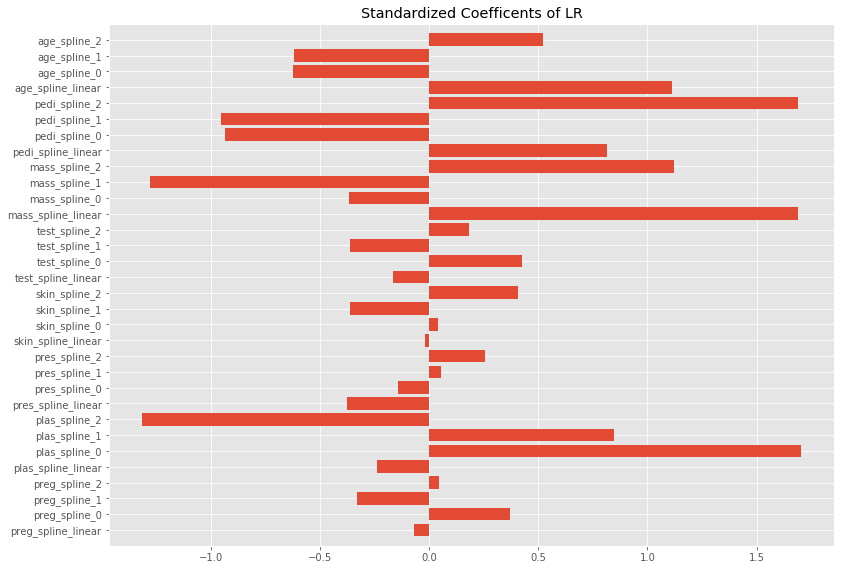

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 6.986470699310303


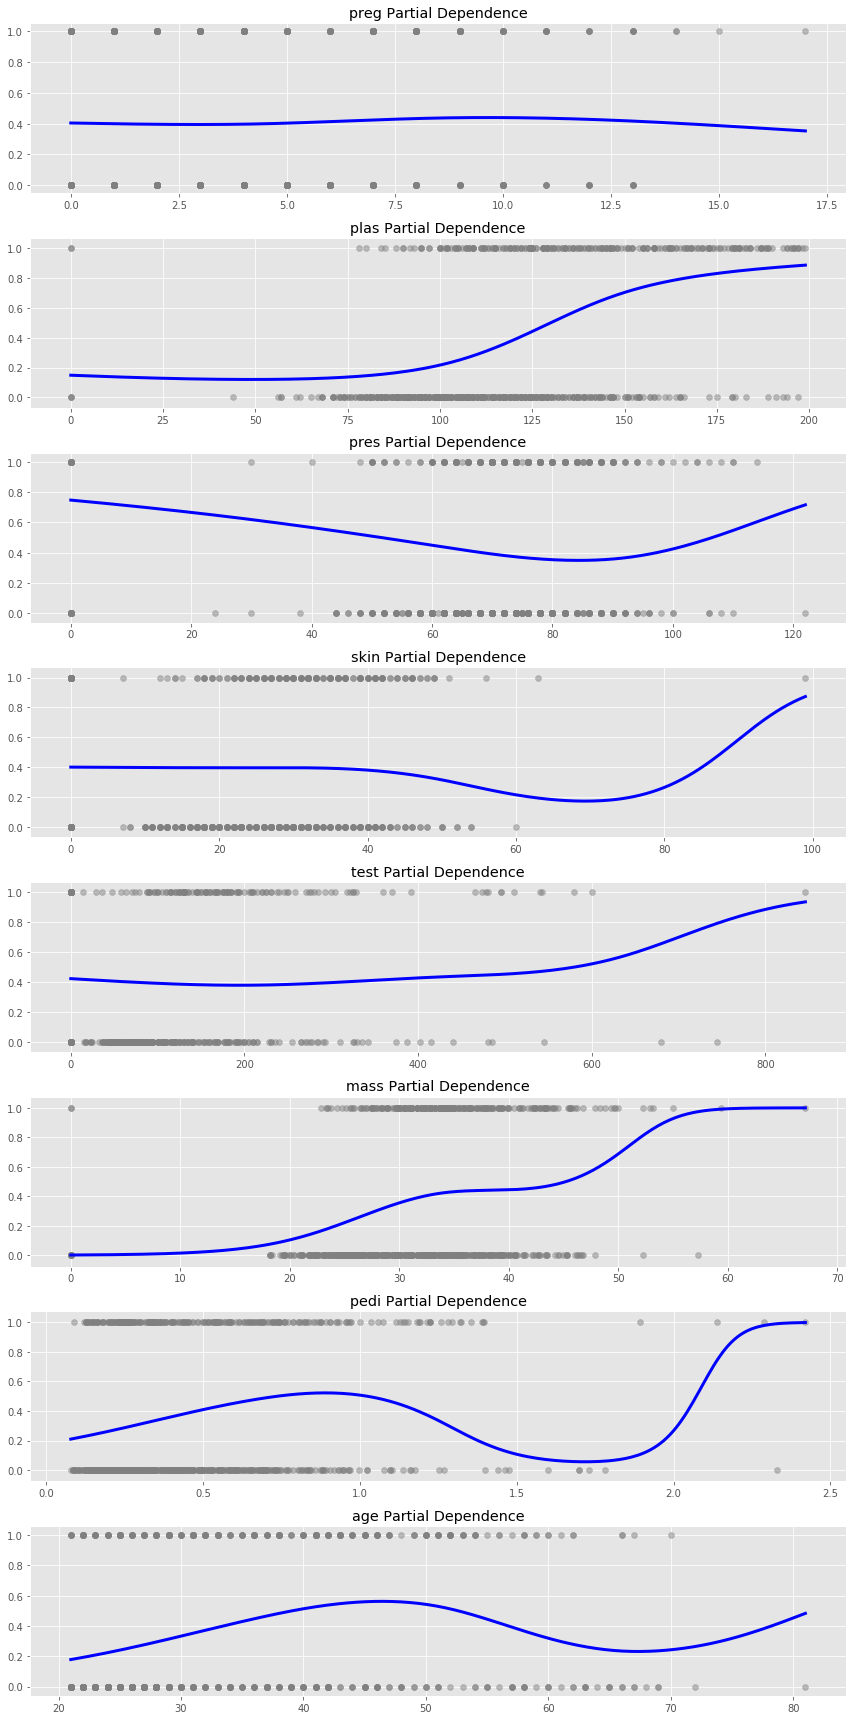

 17%|█▋        | 1/6 [00:09<00:47,  9.58s/it]

LR: logloss = -1.7777490914316865
LR: logloss = 0.6510416666666666
Running: PLOT_CHOOSE_ALPHA ...
PLOT_CHOOSE_ALPHA TIME: 1.7063696384429932
RR: mean=0.774727 std=0.052385
Running: PLOT_COEFS ...
PLOT_COEFS TIME: 0.06664395332336426


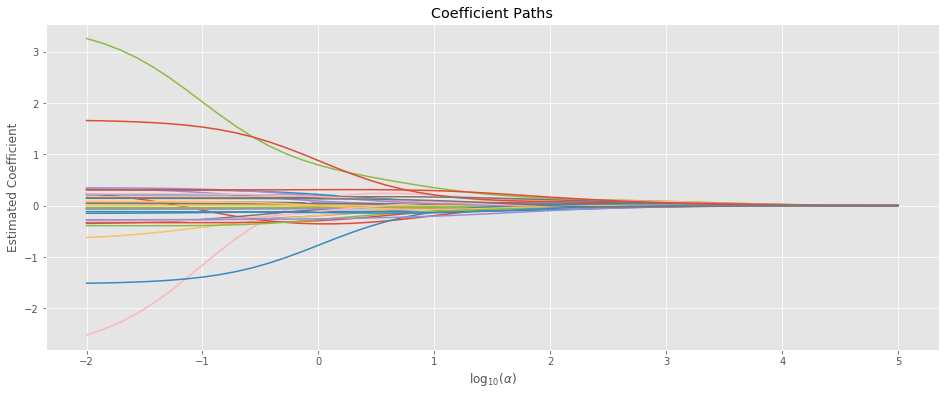

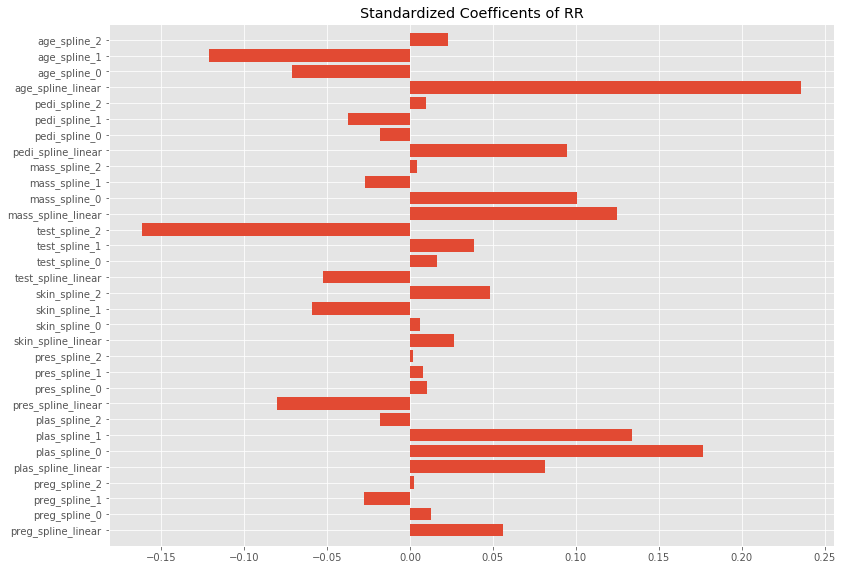

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 6.371855020523071


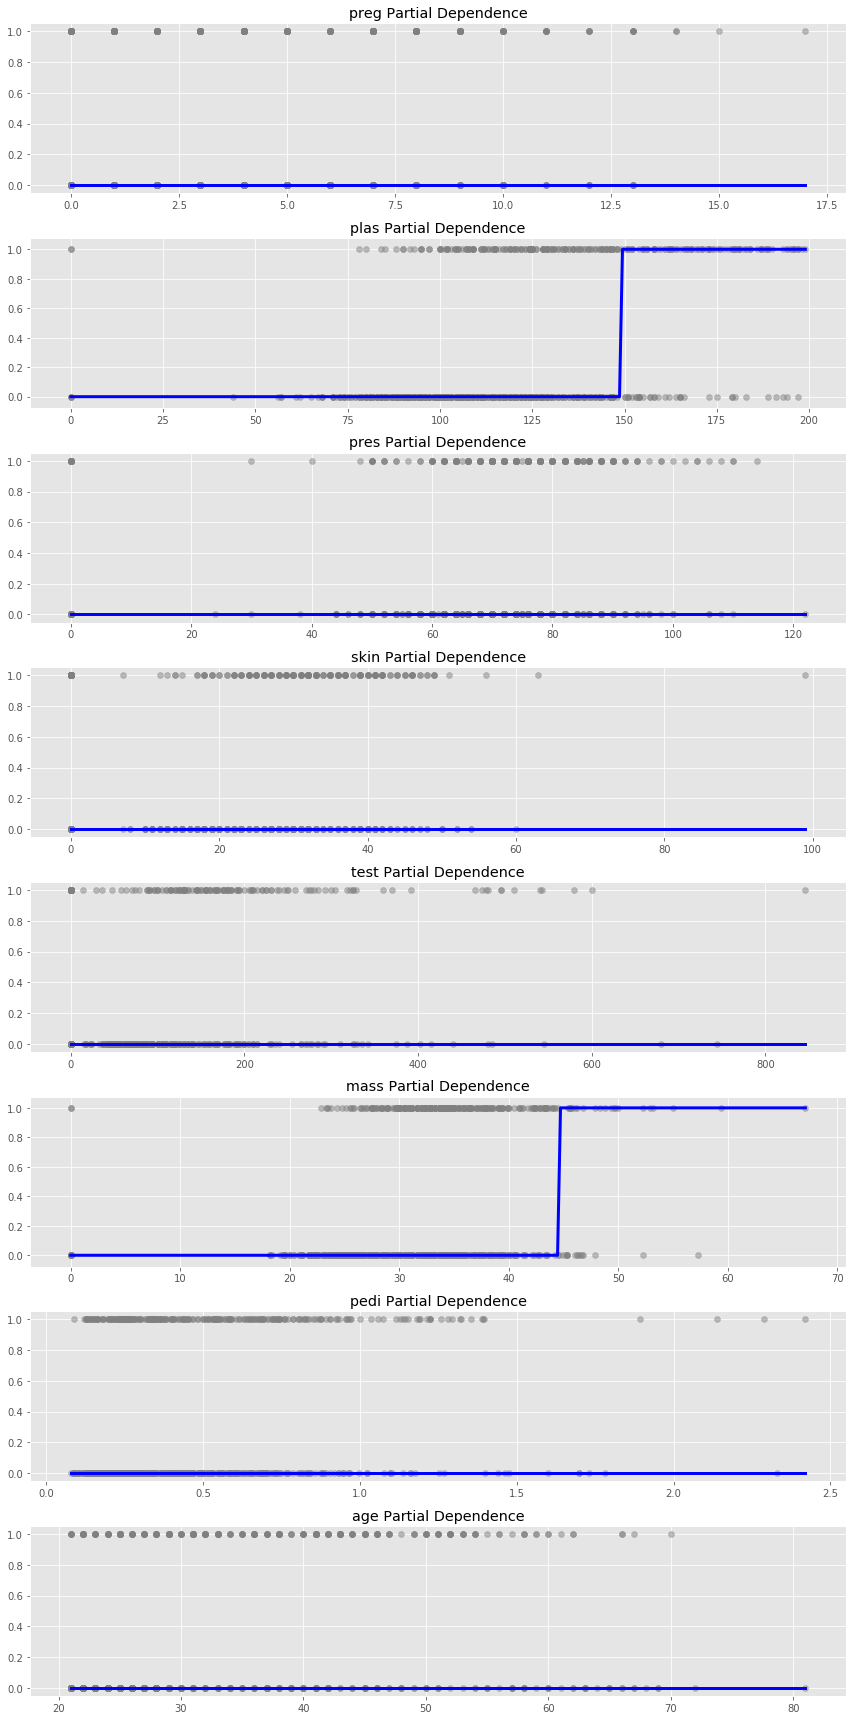

 33%|███▎      | 2/6 [00:20<00:40, 10.20s/it]

RR: logloss = 0.6510416666666666
Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 0.07976078987121582
KNN: mean=0.752529 std=0.049078
Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 7.127351999282837


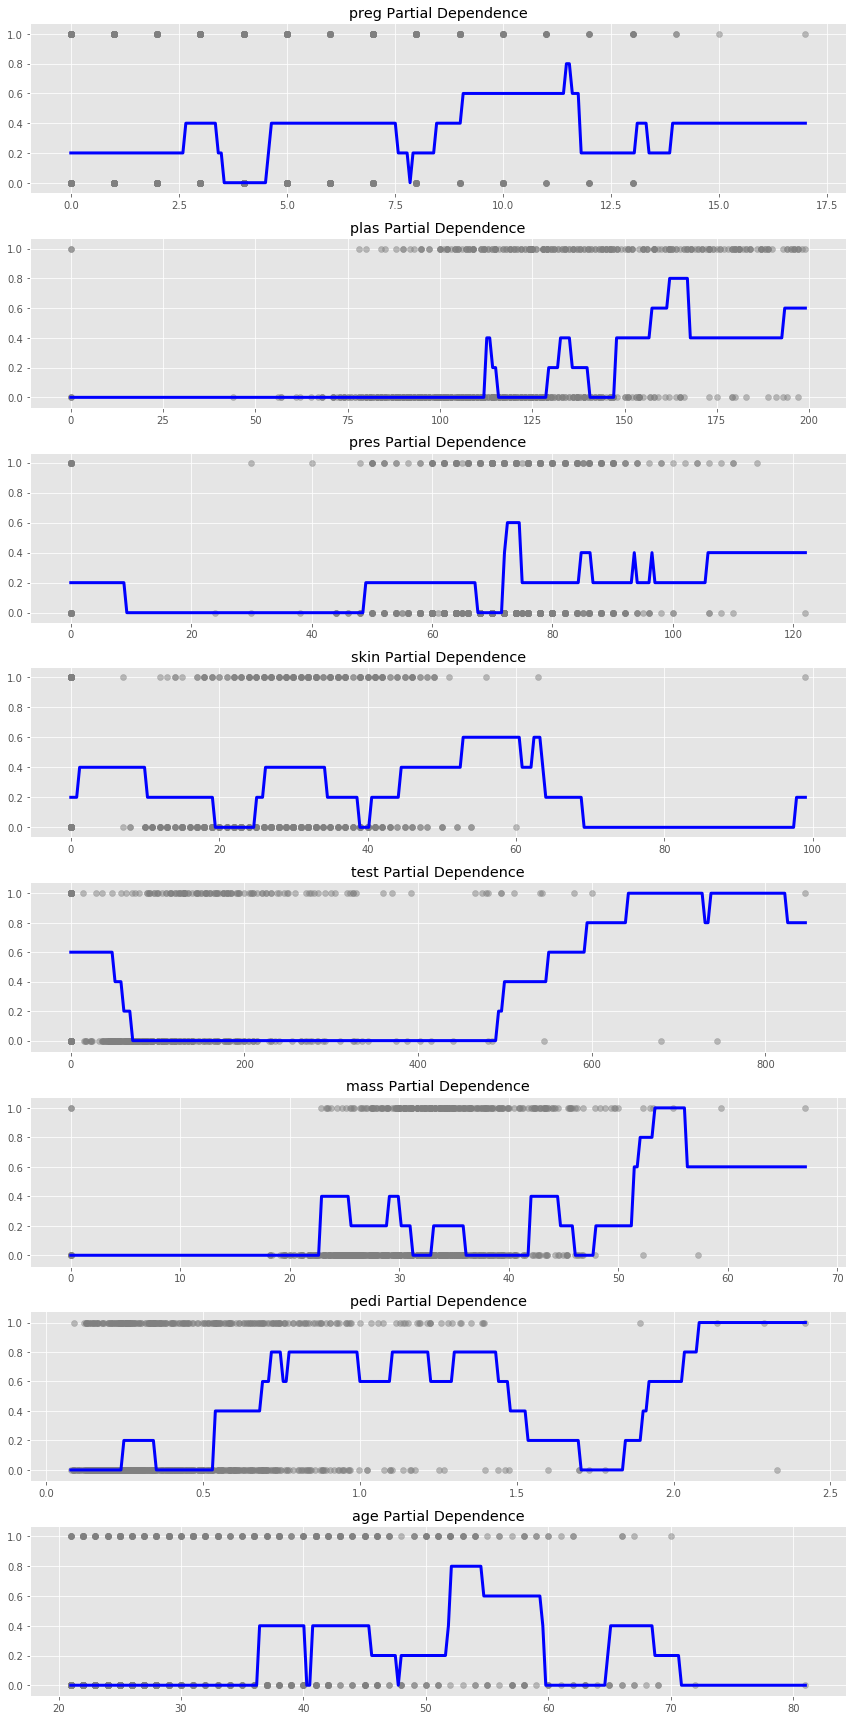

/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:326: RuntimeWarning: divide by zero encountered in log
  logloss = np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
 50%|█████     | 3/6 [00:29<00:29,  9.77s/it]

KNN: logloss = -inf
Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 0.11659693717956543
DT: mean=0.695284 std=0.062191
Running: PLOT_FEATURE_IMPORTANCES ...
PLOT_FEATURE_IMPORTANCES TIME: 0.08170223236083984


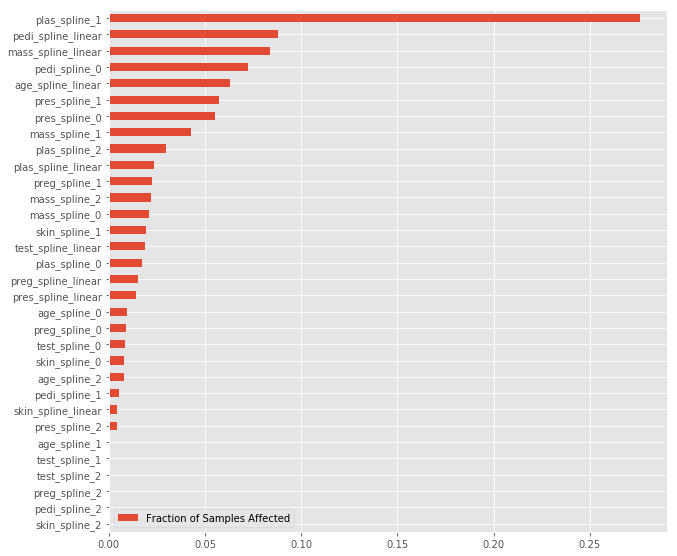

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 5.899781227111816


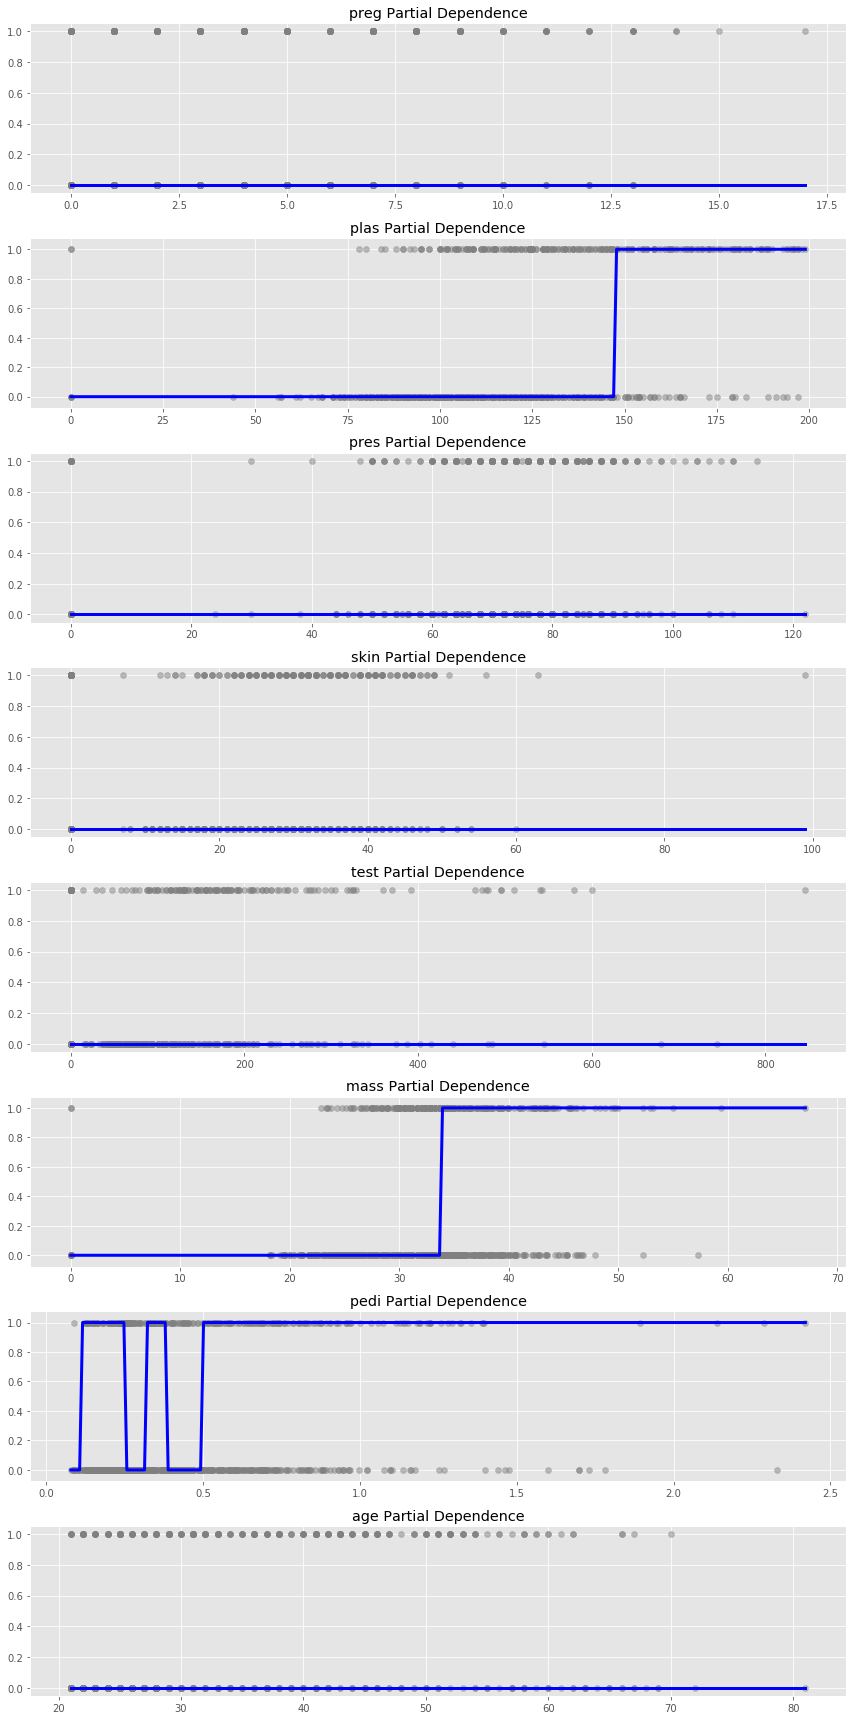

/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:326: RuntimeWarning: divide by zero encountered in log
  logloss = np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
 67%|██████▋   | 4/6 [00:37<00:18,  9.47s/it]

DT: logloss = -inf
Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 0.26306581497192383
RF: mean=0.746070 std=0.059422
Running: PLOT_FEATURE_IMPORTANCES ...
PLOT_FEATURE_IMPORTANCES TIME: 0.08003973960876465


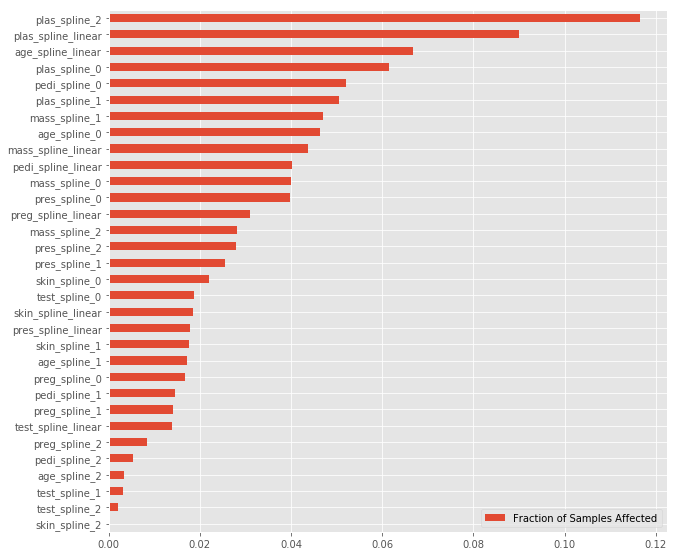

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 6.045893907546997


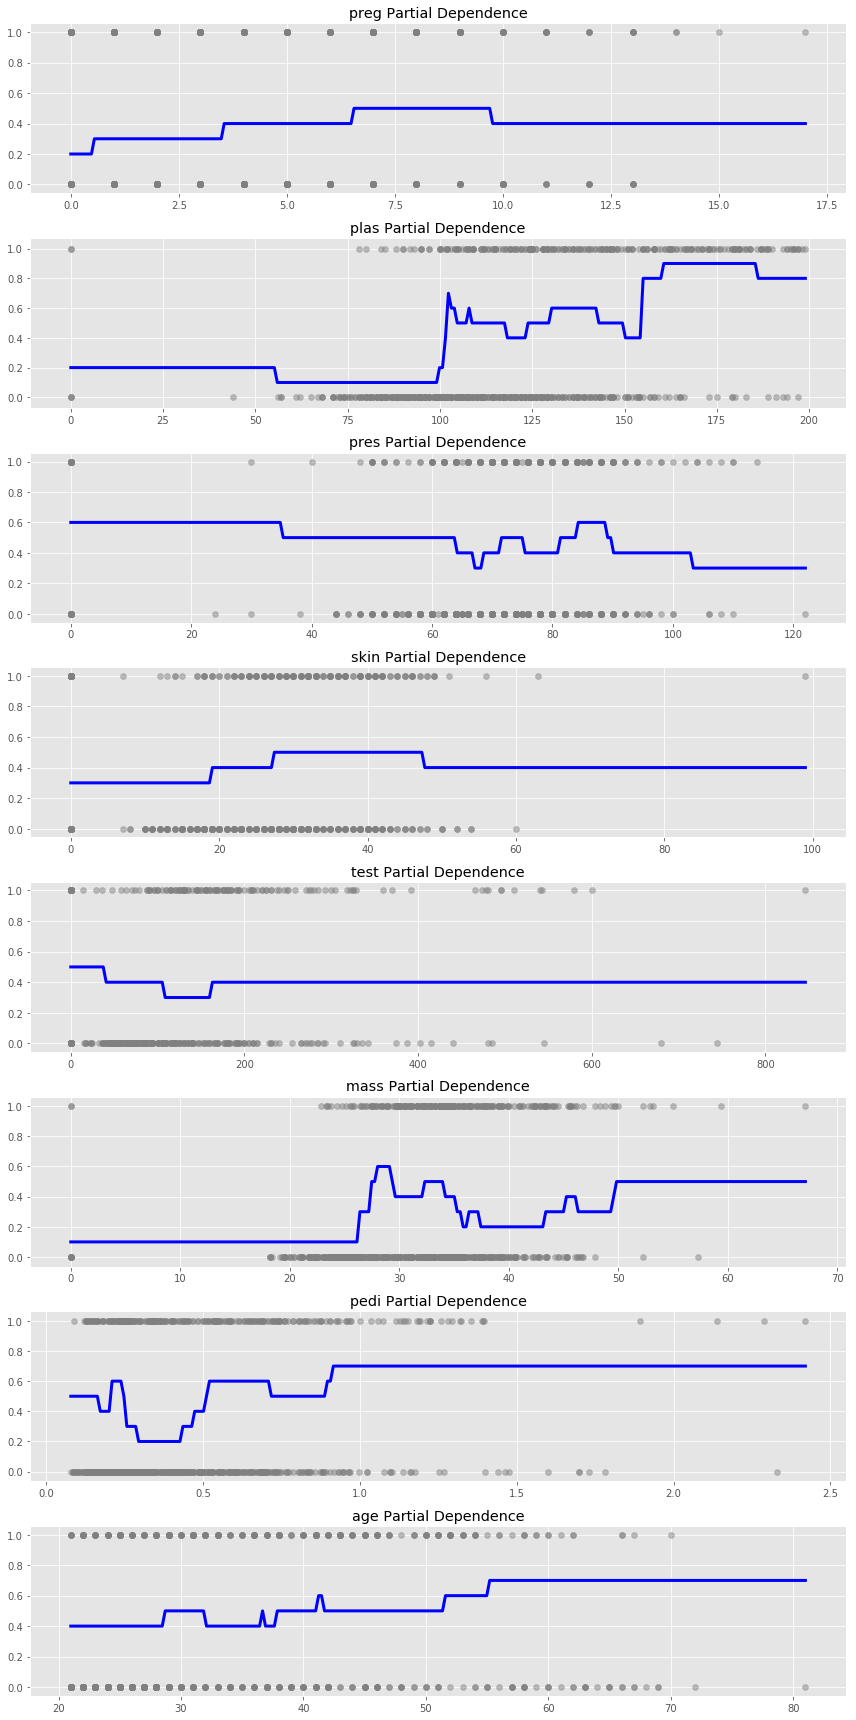

/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:326: RuntimeWarning: divide by zero encountered in log
  logloss = np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
 83%|████████▎ | 5/6 [00:46<00:09,  9.34s/it]

RF: logloss = -inf
Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 1.8710558414459229
GB: mean=0.766900 std=0.058645
Running: PLOT_FEATURE_IMPORTANCES ...
PLOT_FEATURE_IMPORTANCES TIME: 0.06983304023742676


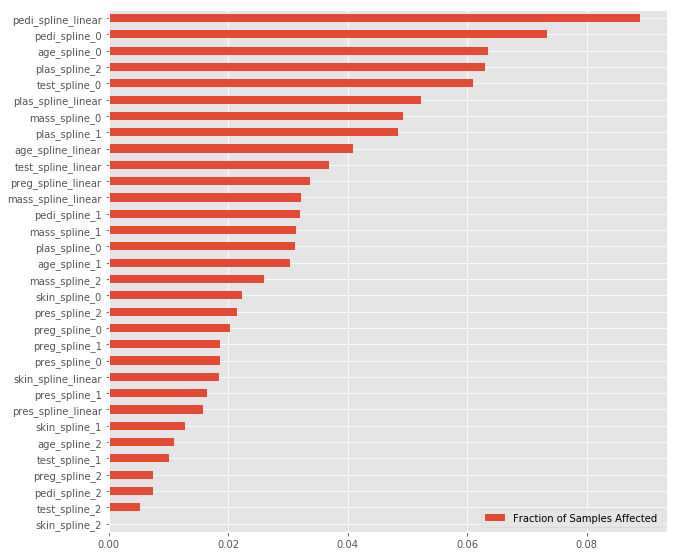

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 5.881062030792236


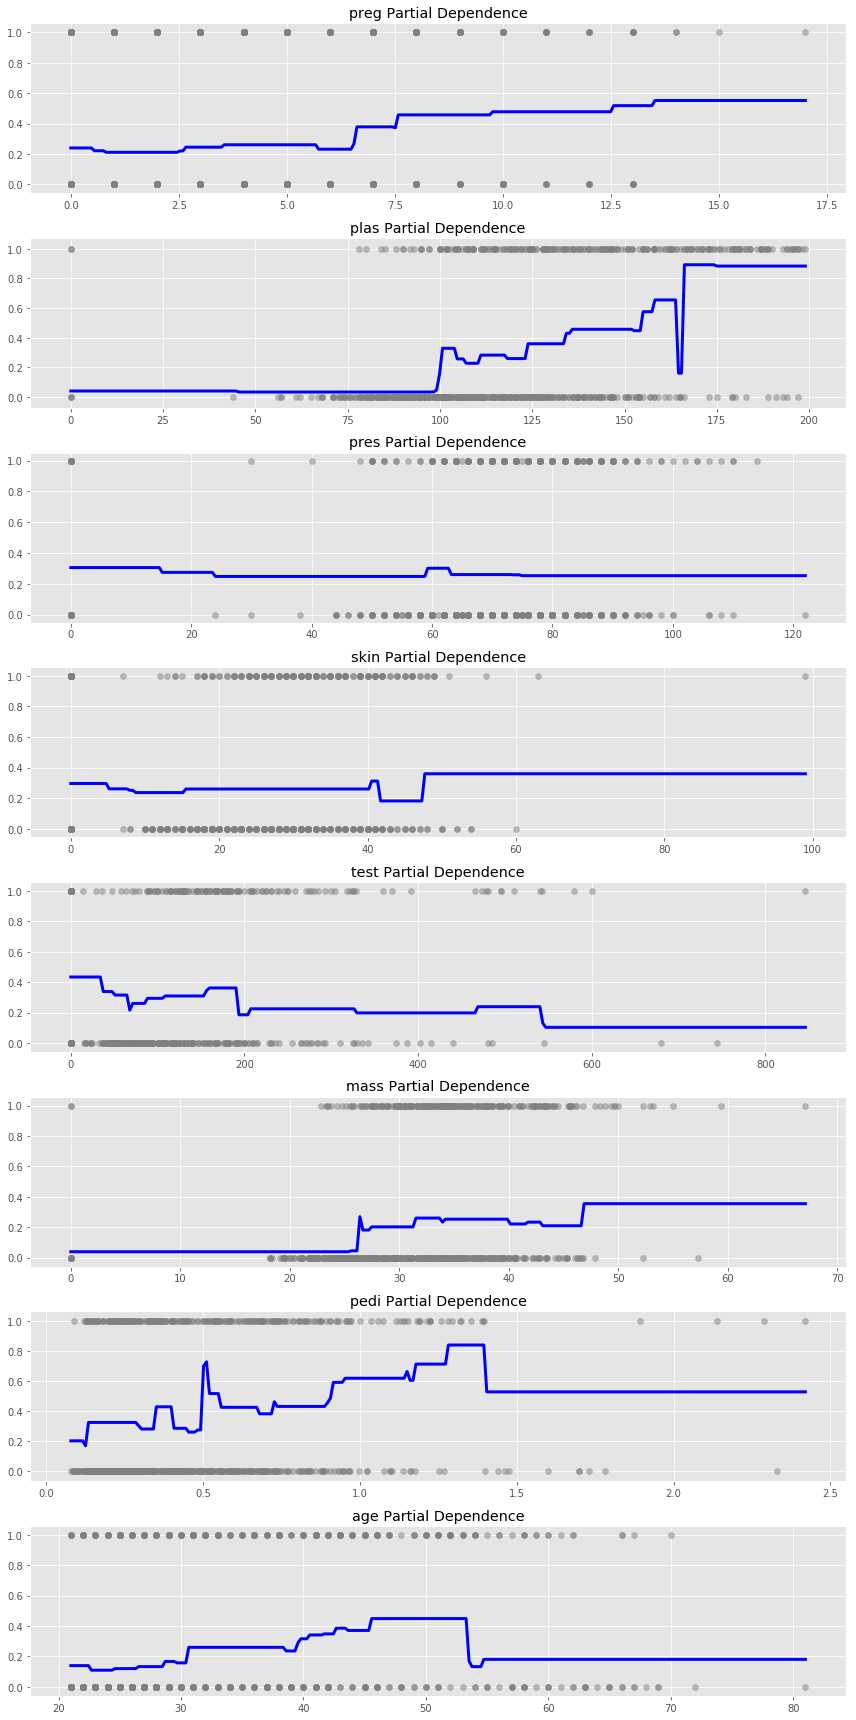

100%|██████████| 6/6 [00:58<00:00,  9.76s/it]

GB: logloss = -2.148772512631362
GB: logloss = 0.6510416666666666
Running: PLOT_BOX_AND_VIOLINS ...


PLOT_BOX_AND_VIOLINS TIME: 0.25006628036499023


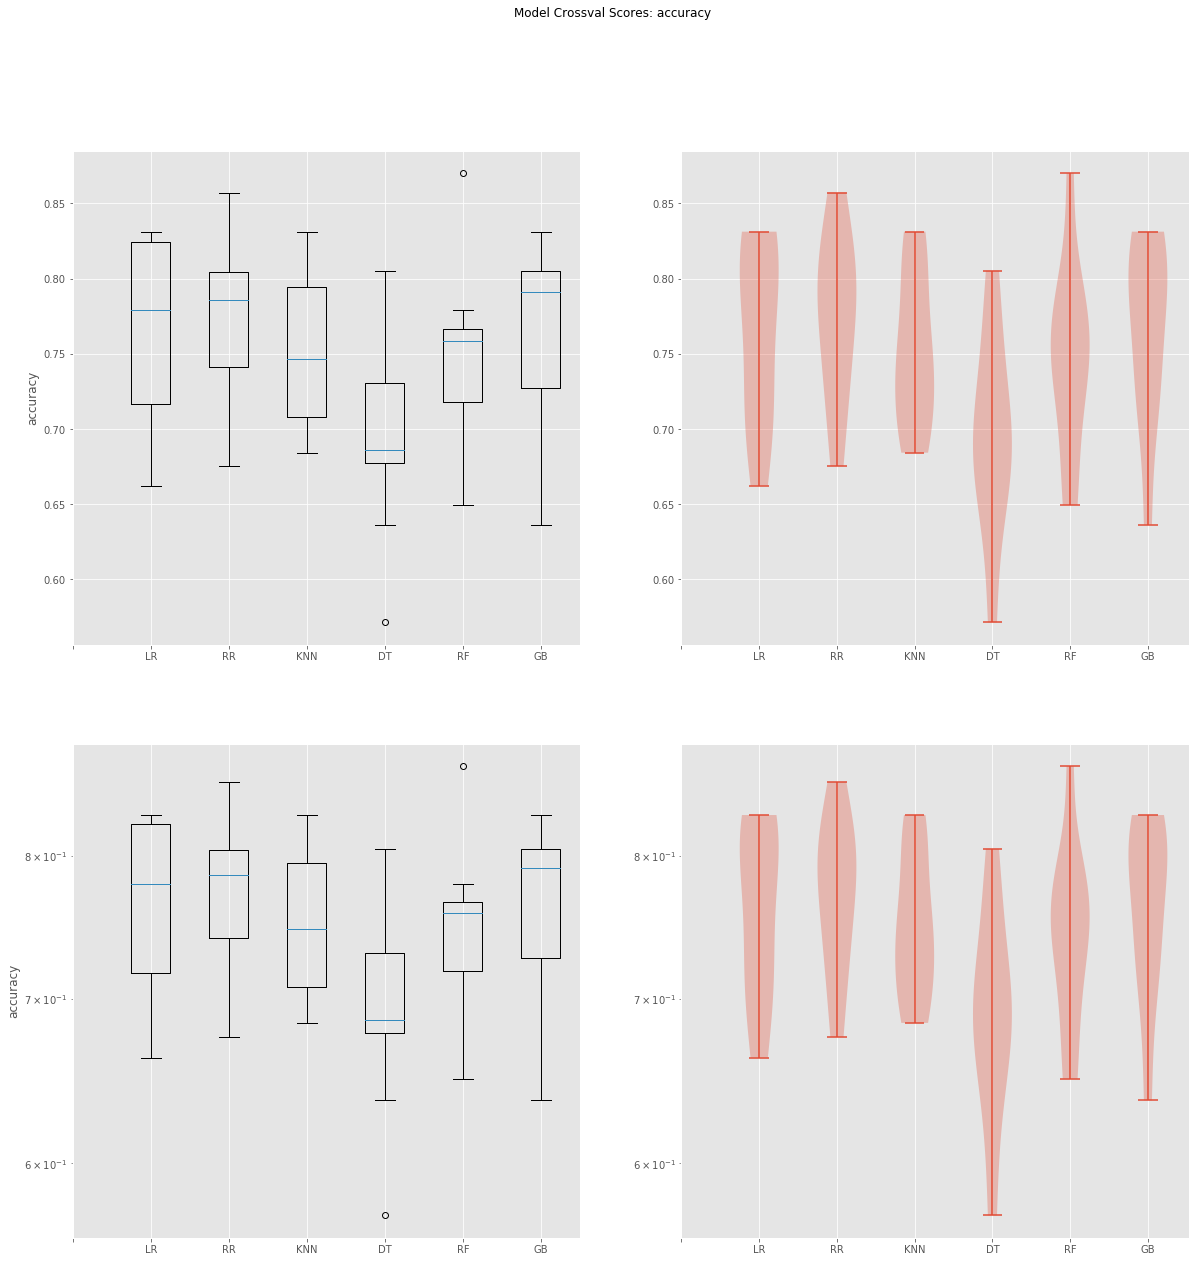

Running: PLOT_ROCS ...
PLOT_ROCS TIME: 0.08487796783447266


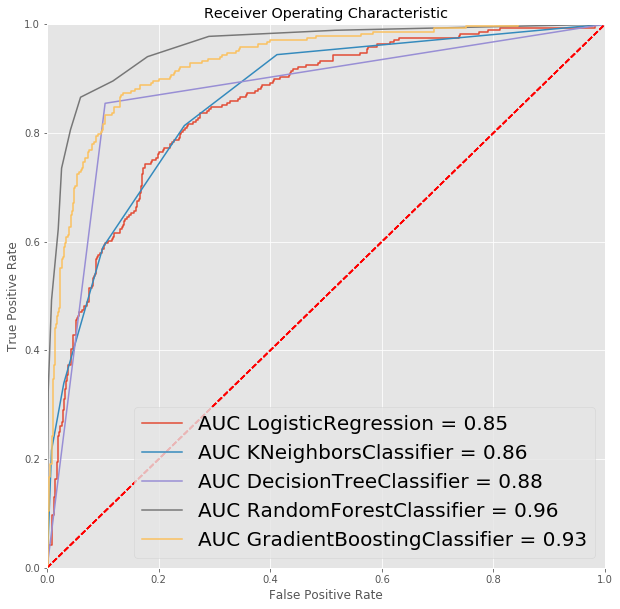

MAKE SUBSAMPLE TIME: 69.8142409324646


In [19]:
names2, results2, models2, pipeline2, df_X2 = autoregression.compare_predictions(df, 'class', univariates=False)

In [20]:
(continuous_features, category_features) = autoregression.sort_features(df)
if len(continuous_features)>15:
    df_graphable = df[continuous_features[:15]].sample(n=1000)
    print('More continuous features than are graphable in scatter_matrix')
    pd.scatter_matrix(df_graphable, figsize=(len(df_graphable)*.11,len(df_graphable)*.1))
else:
    df_graphable = df[continuous_features].sample(n=1000)
plt.show()

ValueError: Cannot take a larger sample than population when 'replace=False'

# Random Uniform Line with Jitter

Running: TAKE_SUBSAMPLE ...
TAKE_SUBSAMPLE TIME: 1.0967254638671875e-05
Running: CLEAN_DF ...
CLEAN_DF TIME: 0.007772207260131836
Running: MATSHOW ...
MATSHOW TIME: 0.015483856201171875
Running: PLOT_SCATTER_MATRIX ...


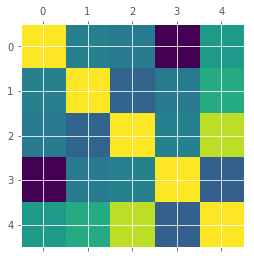

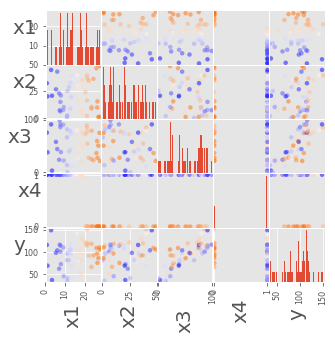

PLOT_SCATTER_MATRIX TIME: 1.7628309726715088
DF COLUMNS: 
['x1', 'x2', 'x3', 'x4', 'y']

DF COLUMNS AFTER TRANSFORM: 
['x1_spline_linear', 'x1_spline_0', 'x1_spline_1', 'x1_spline_2', 'x2_spline_linear', 'x2_spline_0', 'x2_spline_1', 'x2_spline_2', 'x3_spline_linear', 'x3_spline_0', 'x3_spline_1', 'x3_spline_2', 'x4_spline_linear', 'x4_spline_0', 'x4_spline_1', 'x4_spline_2', 'y']

50
Y VARIABLE: "y" IS CONTINUOUS



13it [00:07,  1.66it/s]


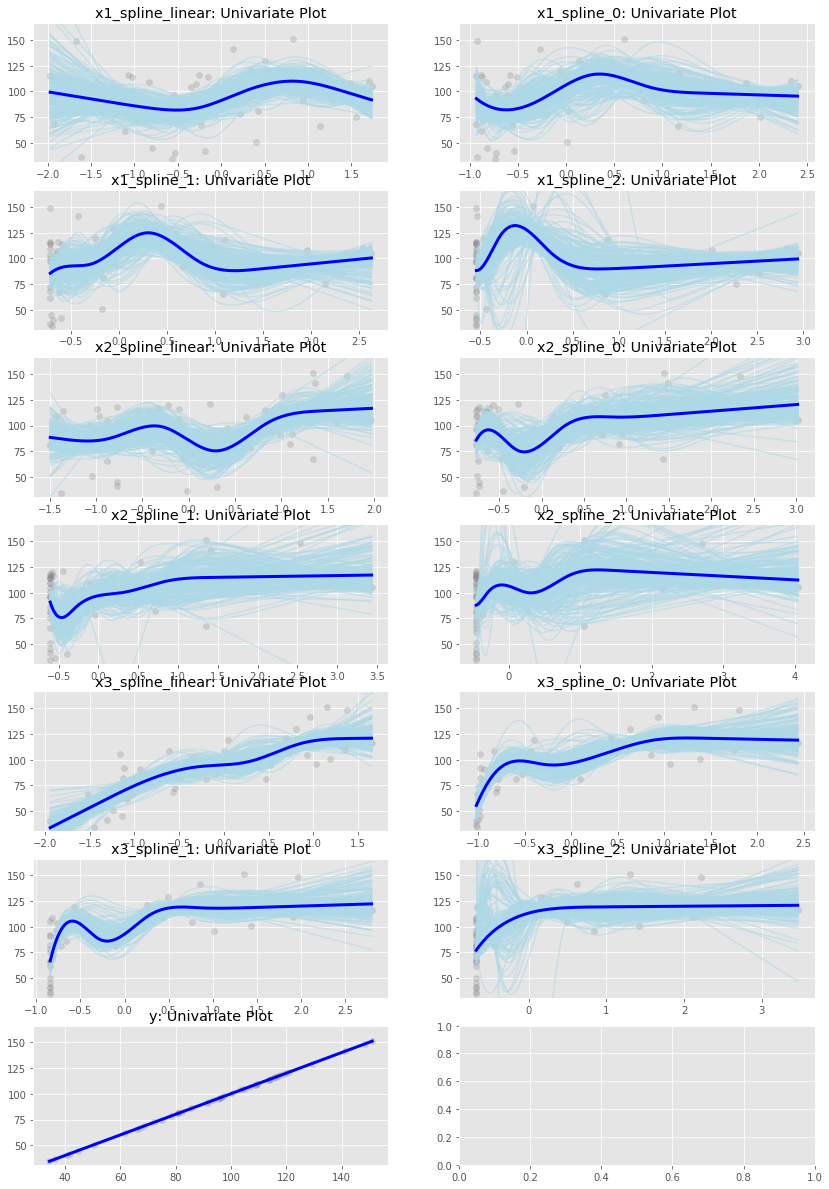

  0%|          | 0/5 [00:00<?, ?it/s]

Running: PLOT_CHOOSE_ALPHA ...
PLOT_CHOOSE_ALPHA TIME: 0.8108022212982178
RR: mean=-9.597641 std=4.450634
Running: PLOT_PREDICTED_VS_ACTUALS ...
PLOT_PREDICTED_VS_ACTUALS TIME: 0.019748687744140625


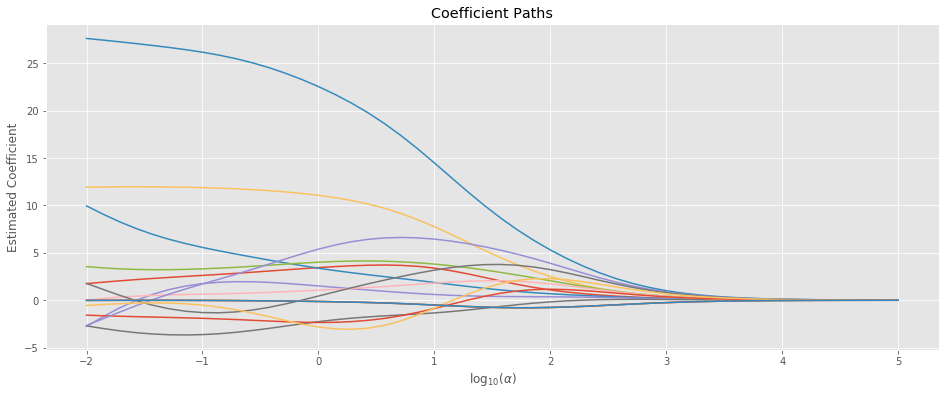

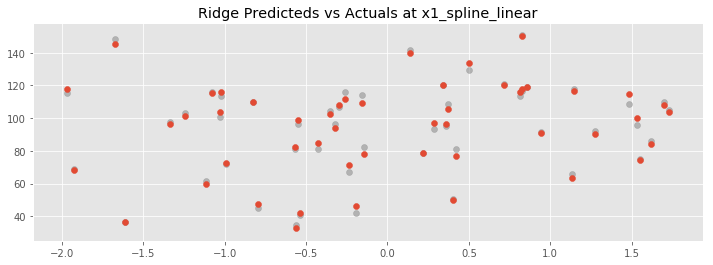

Running: PLOT_COEFS ...
PLOT_COEFS TIME: 0.04575300216674805


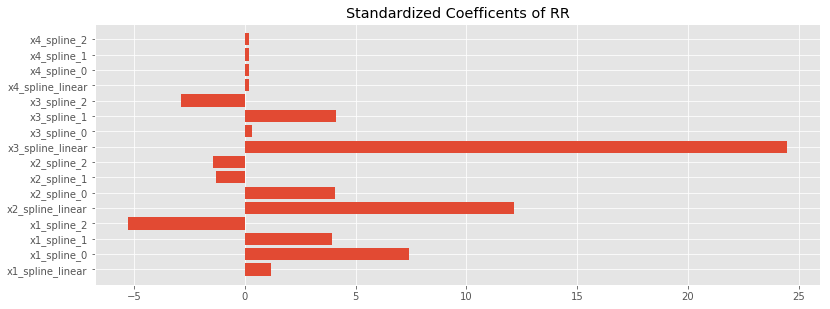

Running: PLOT_BOOTSTRAP_COEFS ...
PLOT_BOOTSTRAP_COEFS TIME: 0.5679948329925537


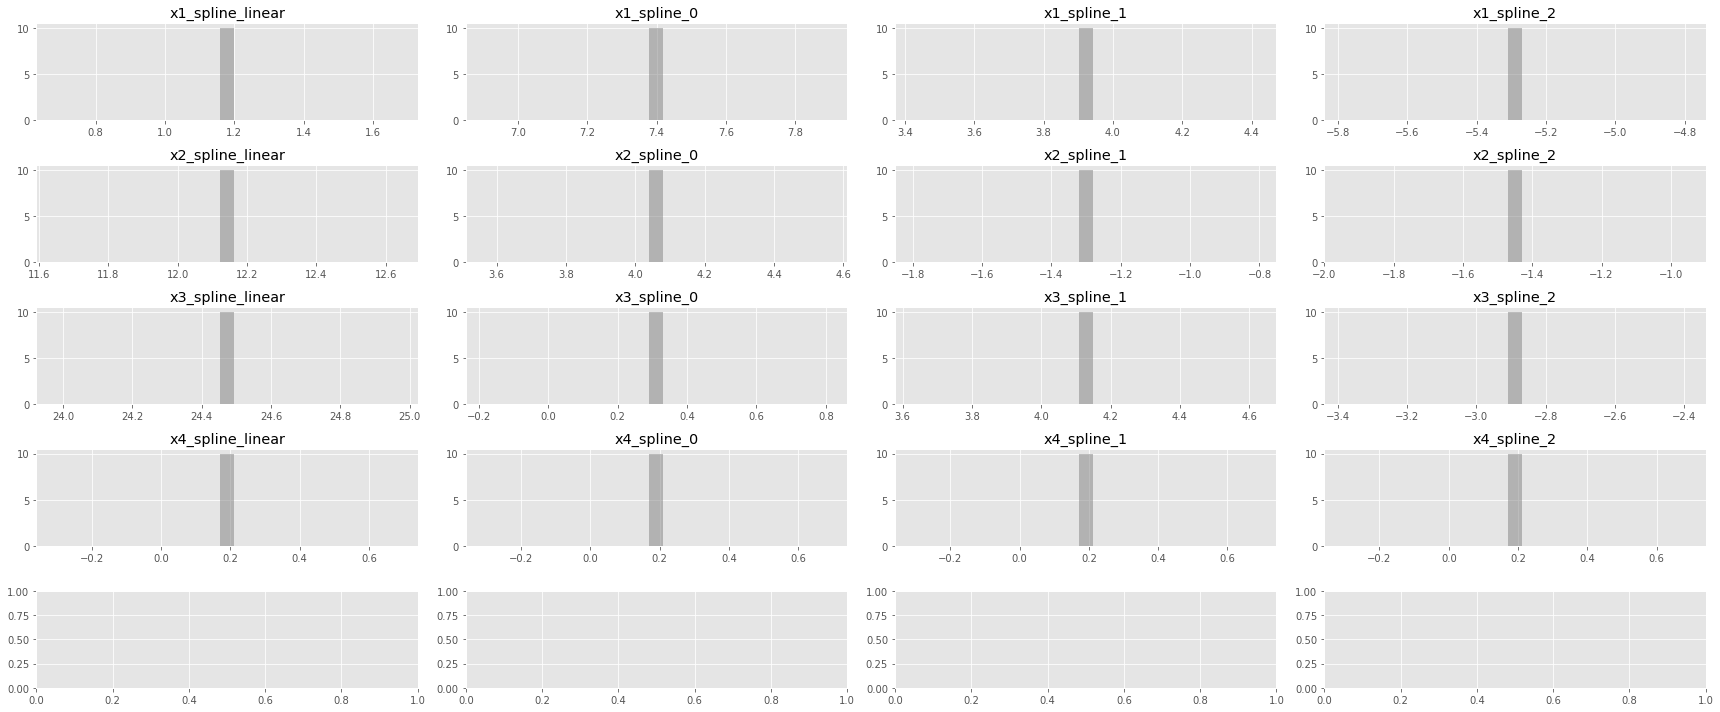

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 1.542128086090088


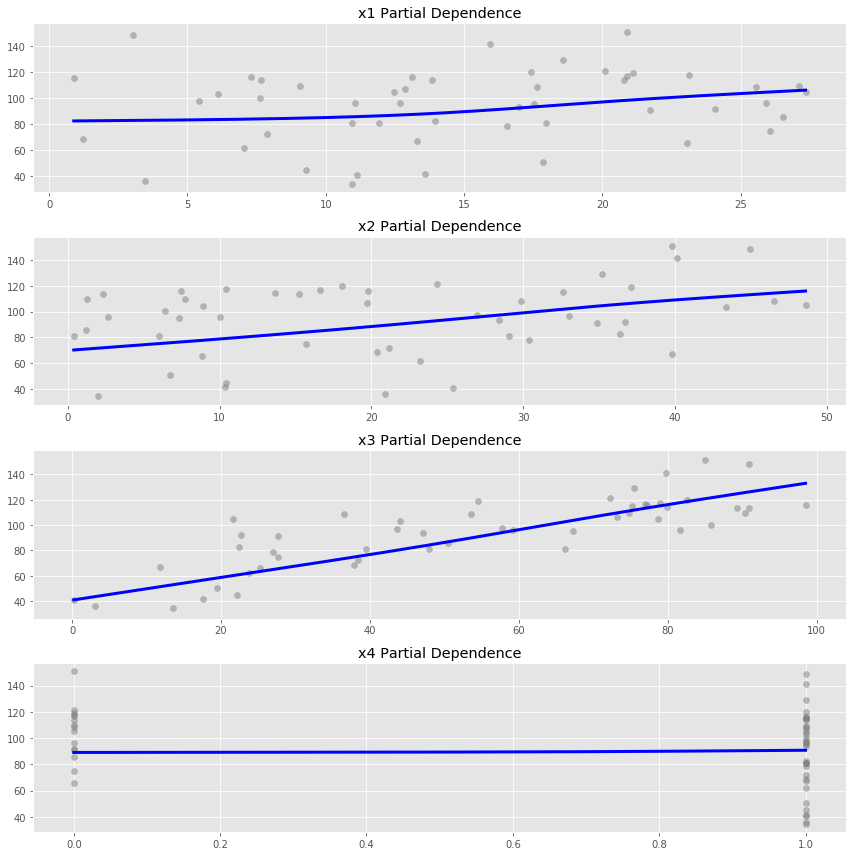

Running: PLOT_MANY_PREDICTEDS_VS_ACTUALS ...
PLOT_MANY_PREDICTEDS_VS_ACTUALS TIME: 0.45051002502441406


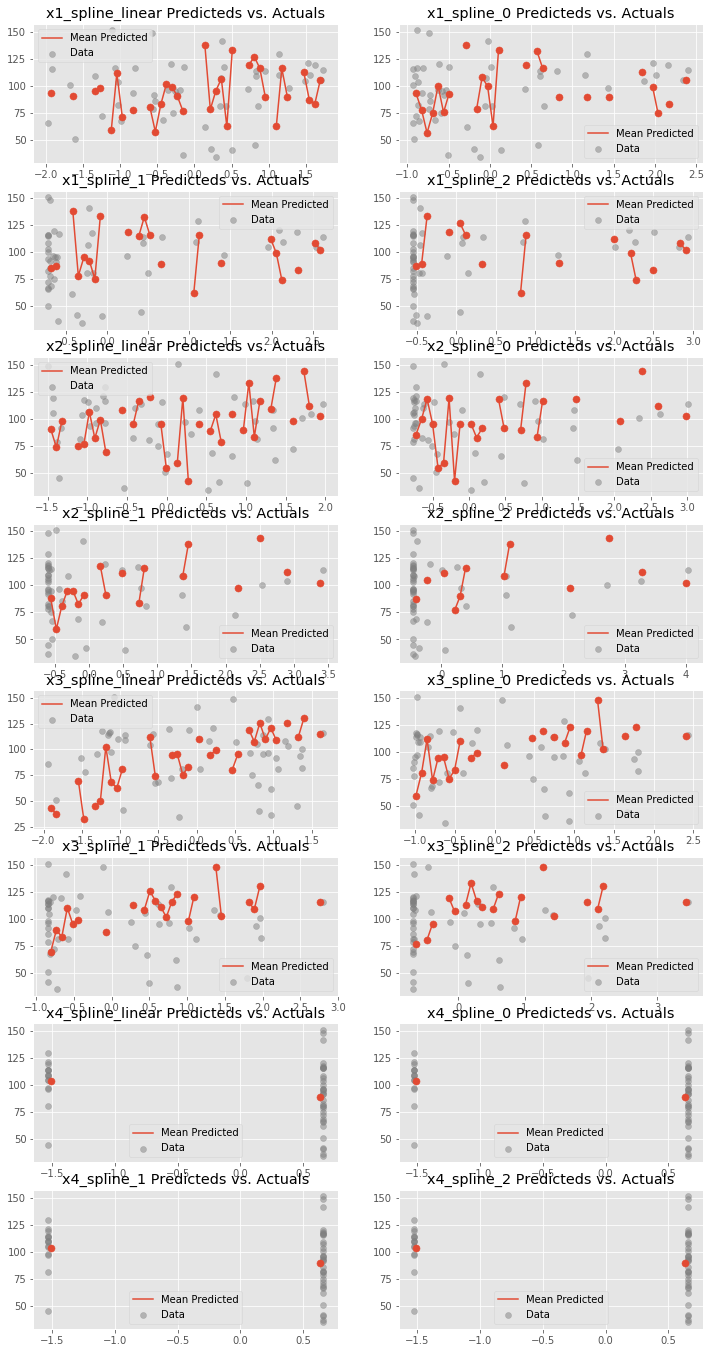

/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:113: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  y.reshape(-1), y_hat_sample.reshape(-1), s=30)


Running: PLOT_RESIDUAL_ERROR ...
PLOT_RESIDUAL_ERROR TIME: 0.00493311882019043


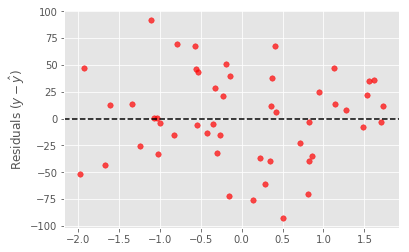

 20%|██        | 1/5 [00:10<00:41, 10.33s/it]

RR: MSE = 8.270771845716487
Running: PLOT_CHOOSE_ALPHA ...
PLOT_CHOOSE_ALPHA TIME: 0.7608342170715332
LASSO: mean=-9.269527 std=4.507471
Running: PLOT_PREDICTED_VS_ACTUALS ...
PLOT_PREDICTED_VS_ACTUALS TIME: 0.020015954971313477


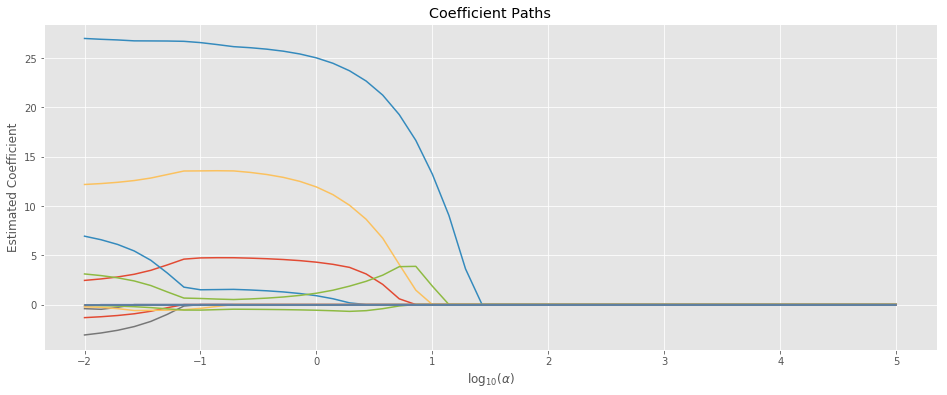

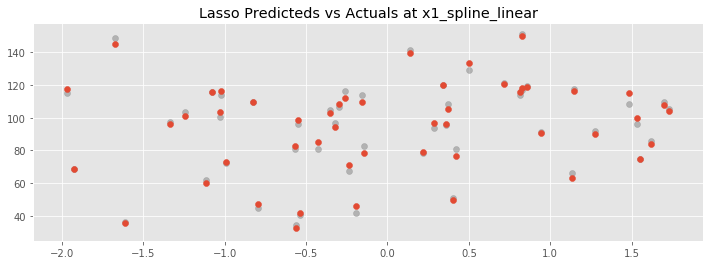

Running: PLOT_COEFS ...
PLOT_COEFS TIME: 0.046909332275390625


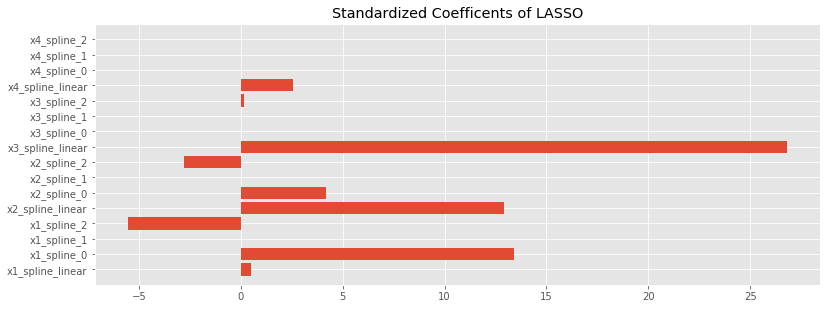

Running: PLOT_BOOTSTRAP_COEFS ...
PLOT_BOOTSTRAP_COEFS TIME: 0.5555031299591064


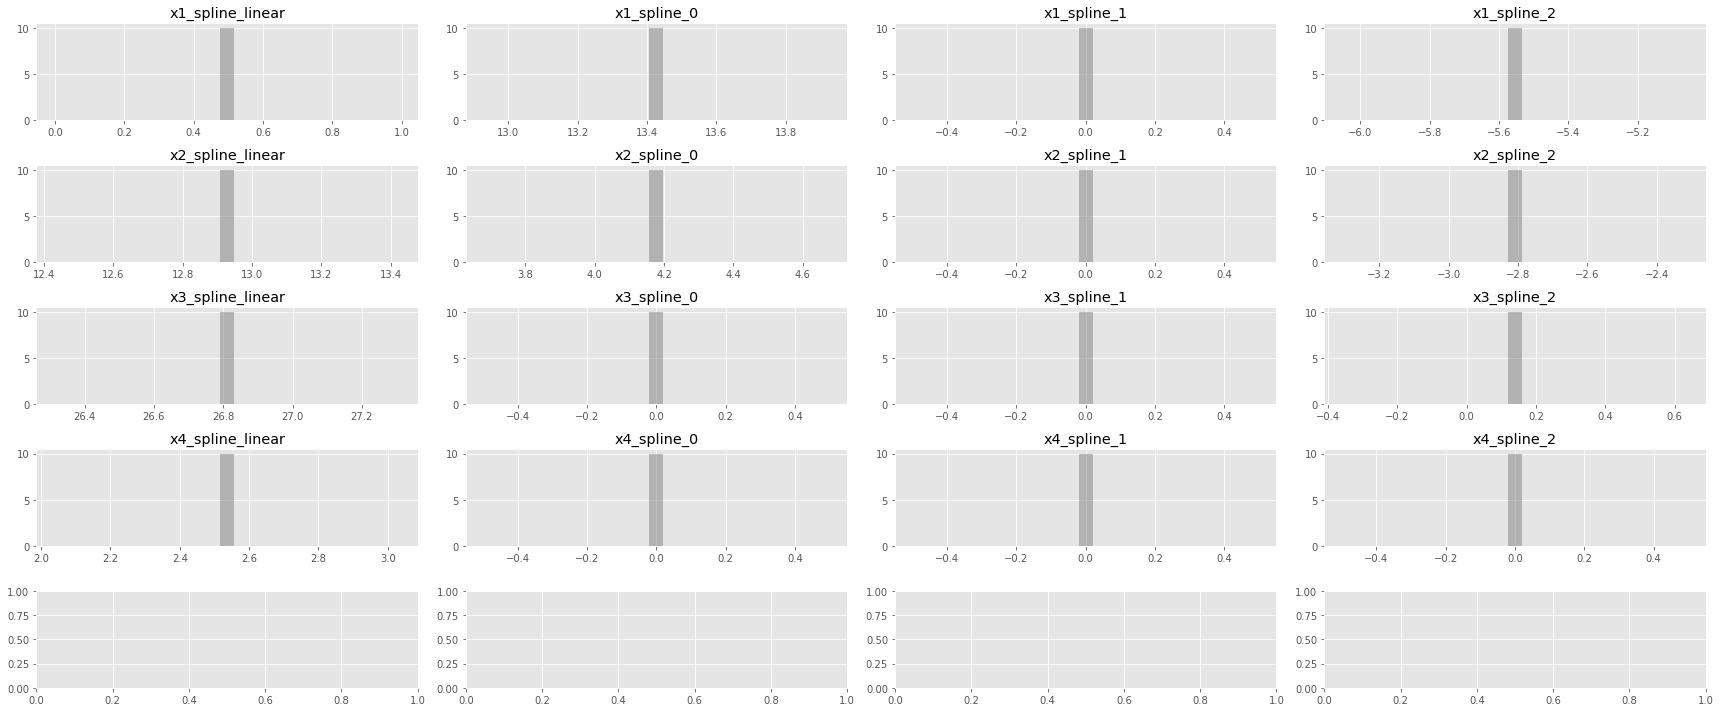

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 1.387483835220337


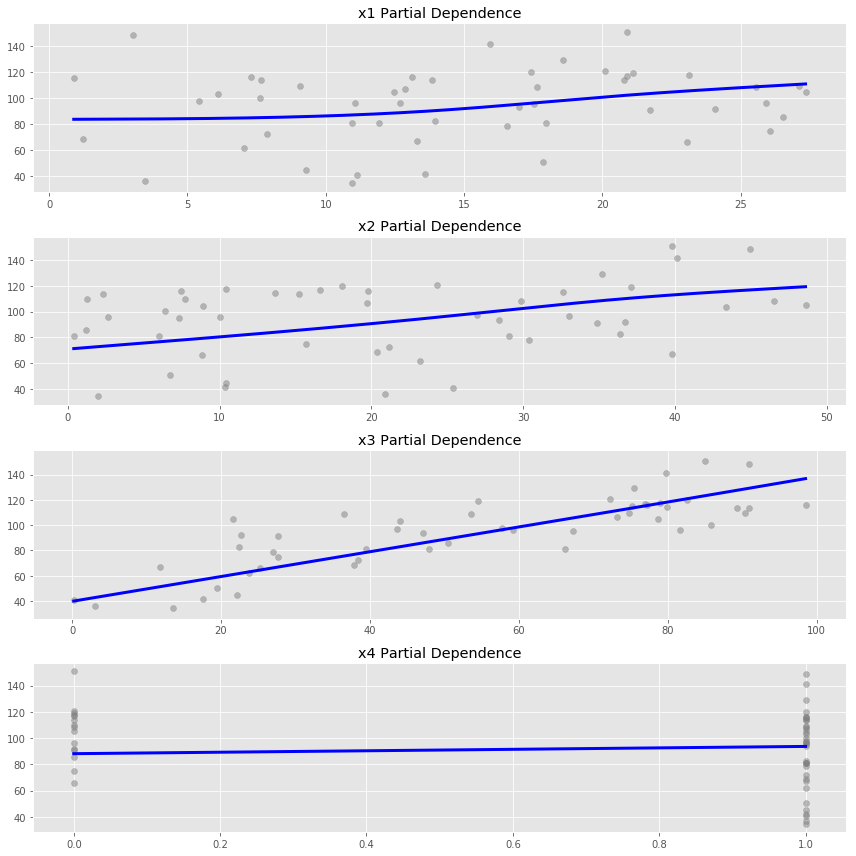

Running: PLOT_MANY_PREDICTEDS_VS_ACTUALS ...
PLOT_MANY_PREDICTEDS_VS_ACTUALS TIME: 0.4475059509277344


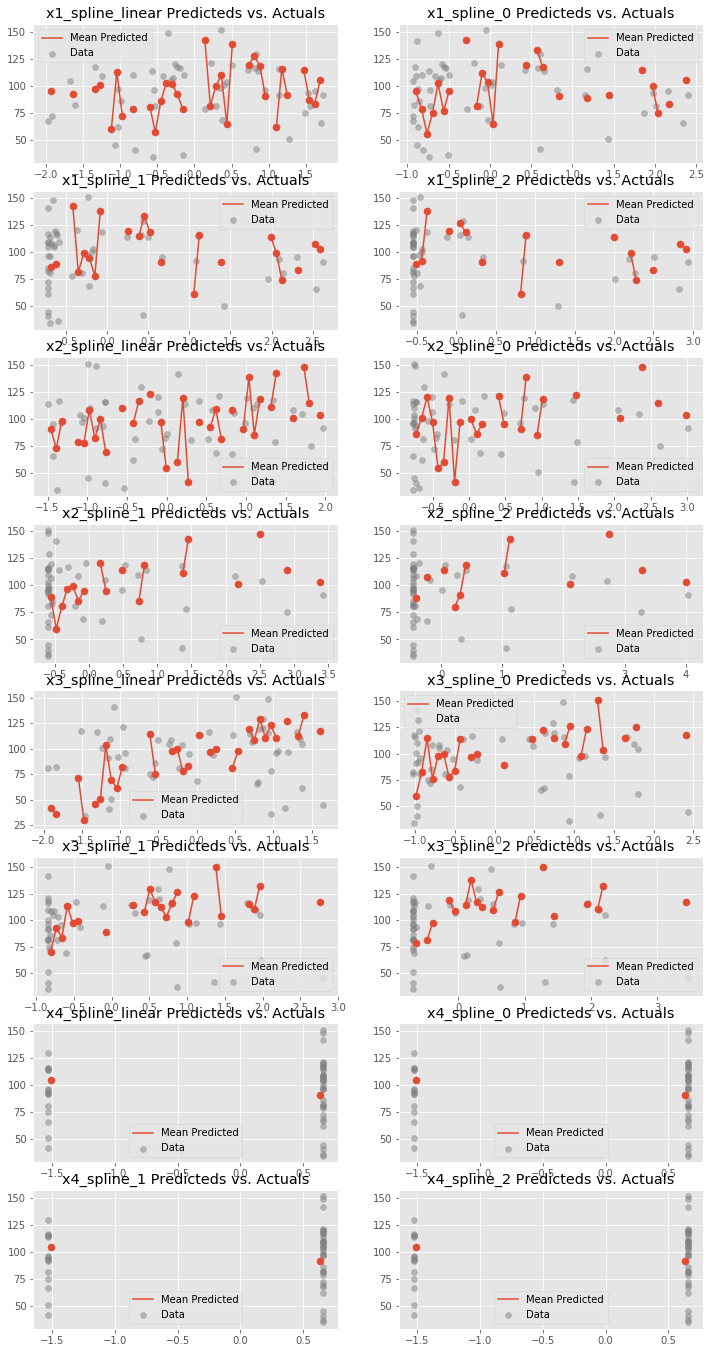

Running: PLOT_RESIDUAL_ERROR ...
PLOT_RESIDUAL_ERROR TIME: 0.004580020904541016


/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:113: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  y.reshape(-1), y_hat_sample.reshape(-1), s=30)


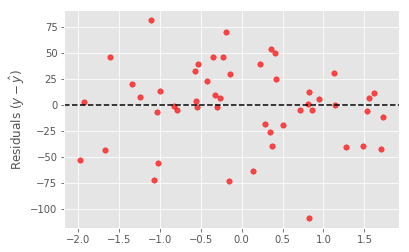

 40%|████      | 2/5 [00:19<00:29,  9.99s/it]

LASSO: MSE = 8.501857559596285
Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 0.019631147384643555
DT: mean=-170.435211 std=126.862029
Running: PLOT_PREDICTED_VS_ACTUALS ...
PLOT_PREDICTED_VS_ACTUALS TIME: 0.023916006088256836


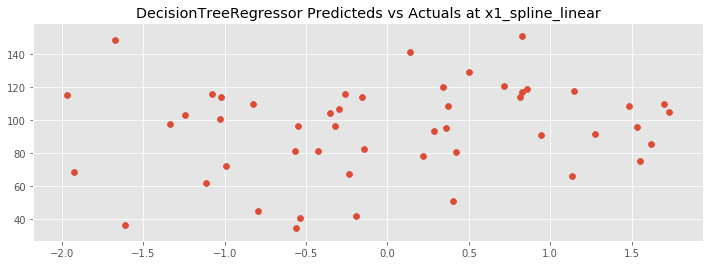

Running: PLOT_FEATURE_IMPORTANCES ...
PLOT_FEATURE_IMPORTANCES TIME: 0.05322599411010742


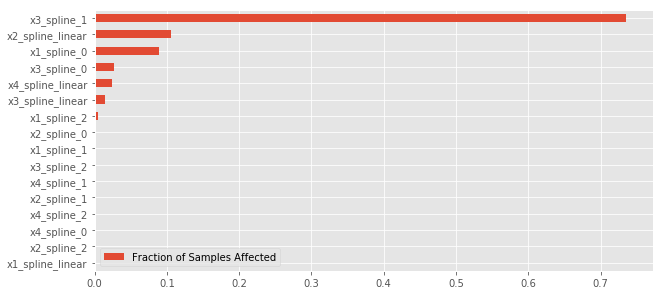

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 1.498399019241333


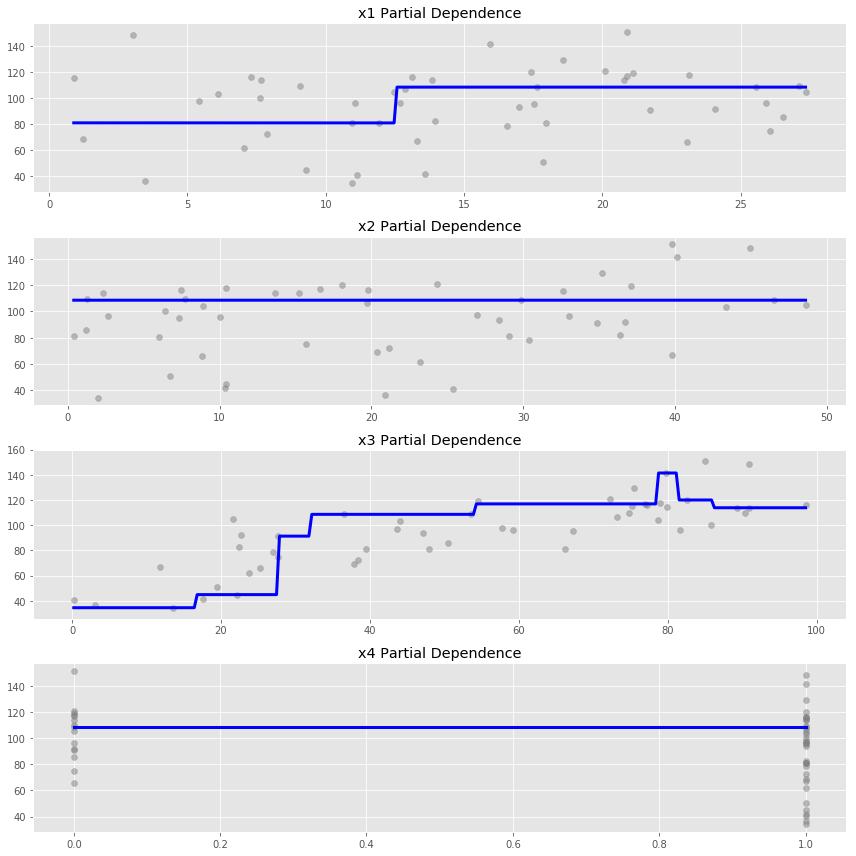

Running: PLOT_MANY_PREDICTEDS_VS_ACTUALS ...
PLOT_MANY_PREDICTEDS_VS_ACTUALS TIME: 0.46245694160461426


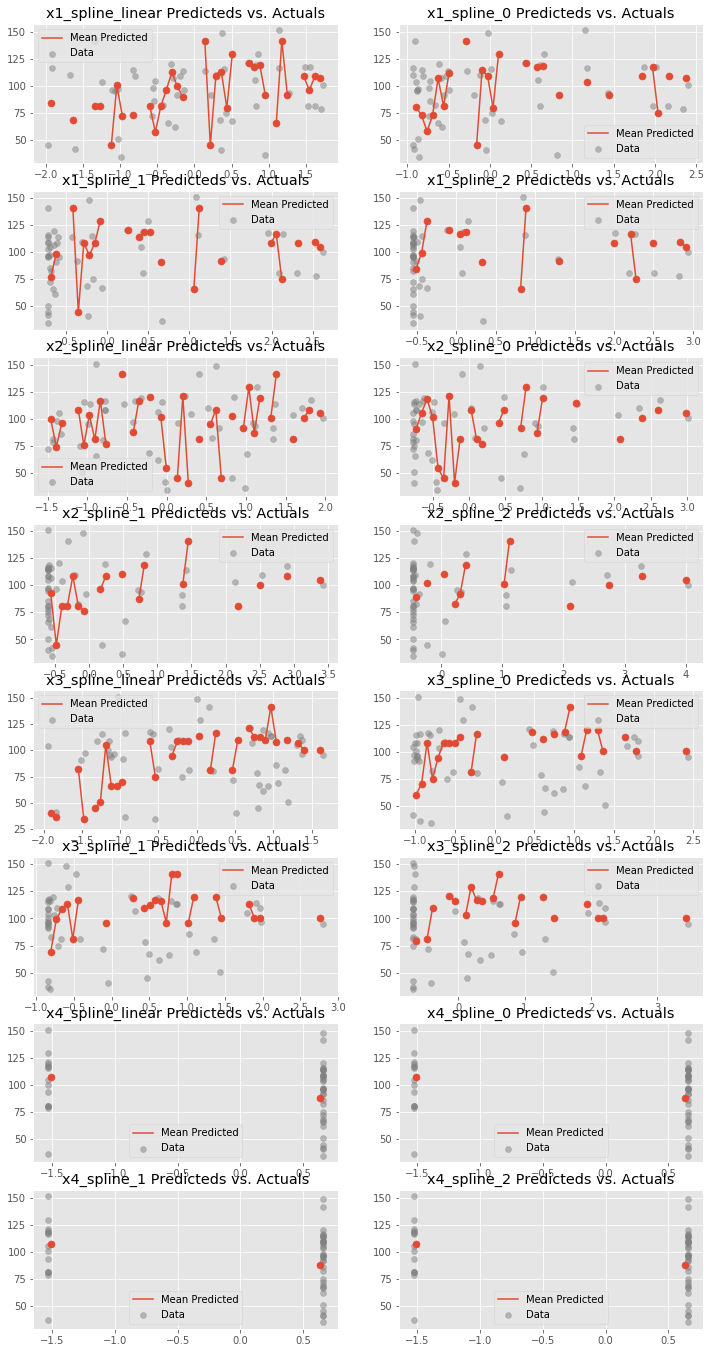

Running: PLOT_RESIDUAL_ERROR ...
PLOT_RESIDUAL_ERROR TIME: 0.00658726692199707


/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:113: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  y.reshape(-1), y_hat_sample.reshape(-1), s=30)


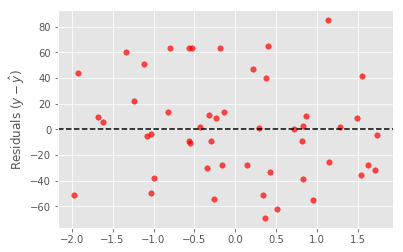

 60%|██████    | 3/5 [00:25<00:17,  8.55s/it]

DT: MSE = 206.84583651656925
Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 0.1739668846130371
RF: mean=-146.475664 std=128.977061
Running: PLOT_PREDICTED_VS_ACTUALS ...
PLOT_PREDICTED_VS_ACTUALS TIME: 0.023659944534301758


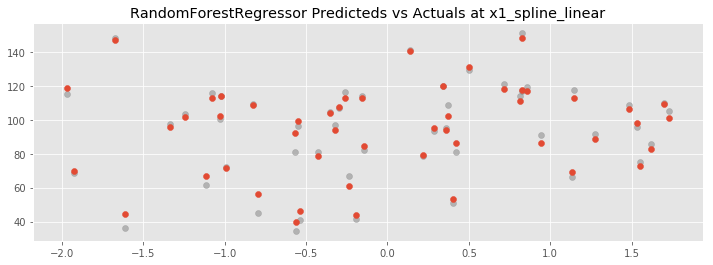

Running: PLOT_FEATURE_IMPORTANCES ...
PLOT_FEATURE_IMPORTANCES TIME: 0.059329986572265625


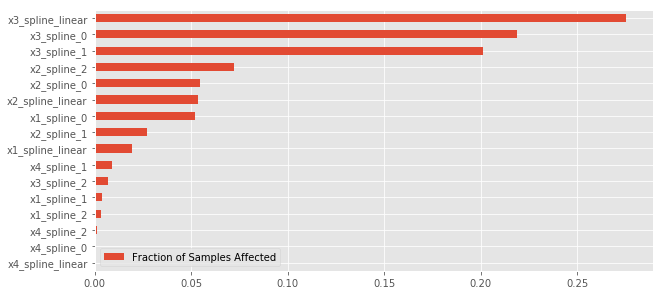

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 1.5764548778533936


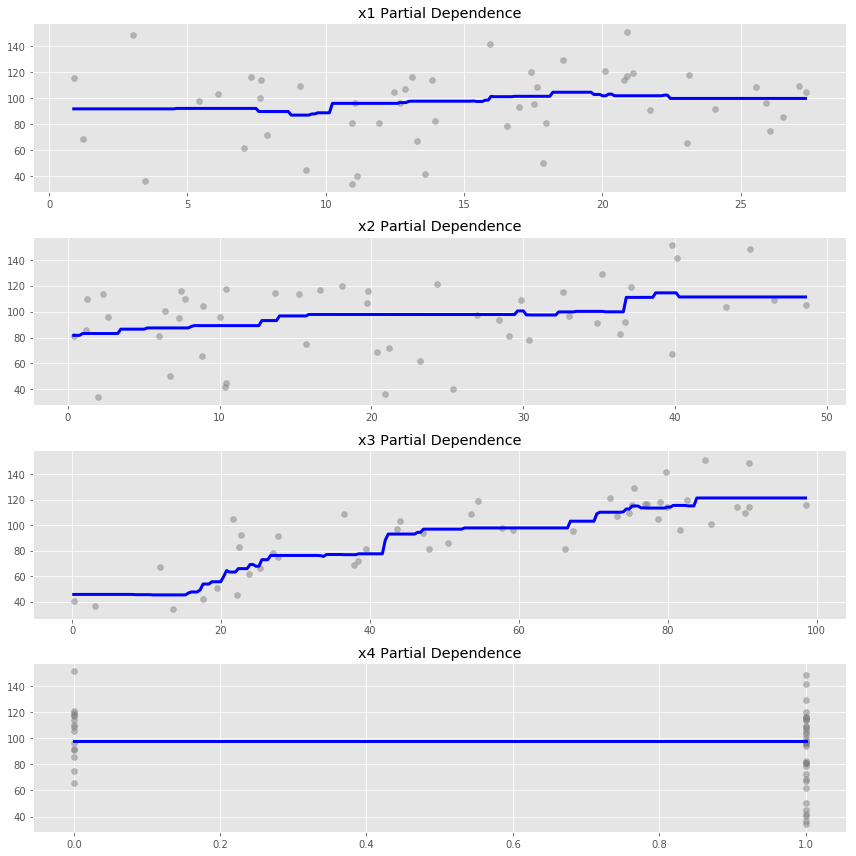

Running: PLOT_MANY_PREDICTEDS_VS_ACTUALS ...
PLOT_MANY_PREDICTEDS_VS_ACTUALS TIME: 0.4592118263244629


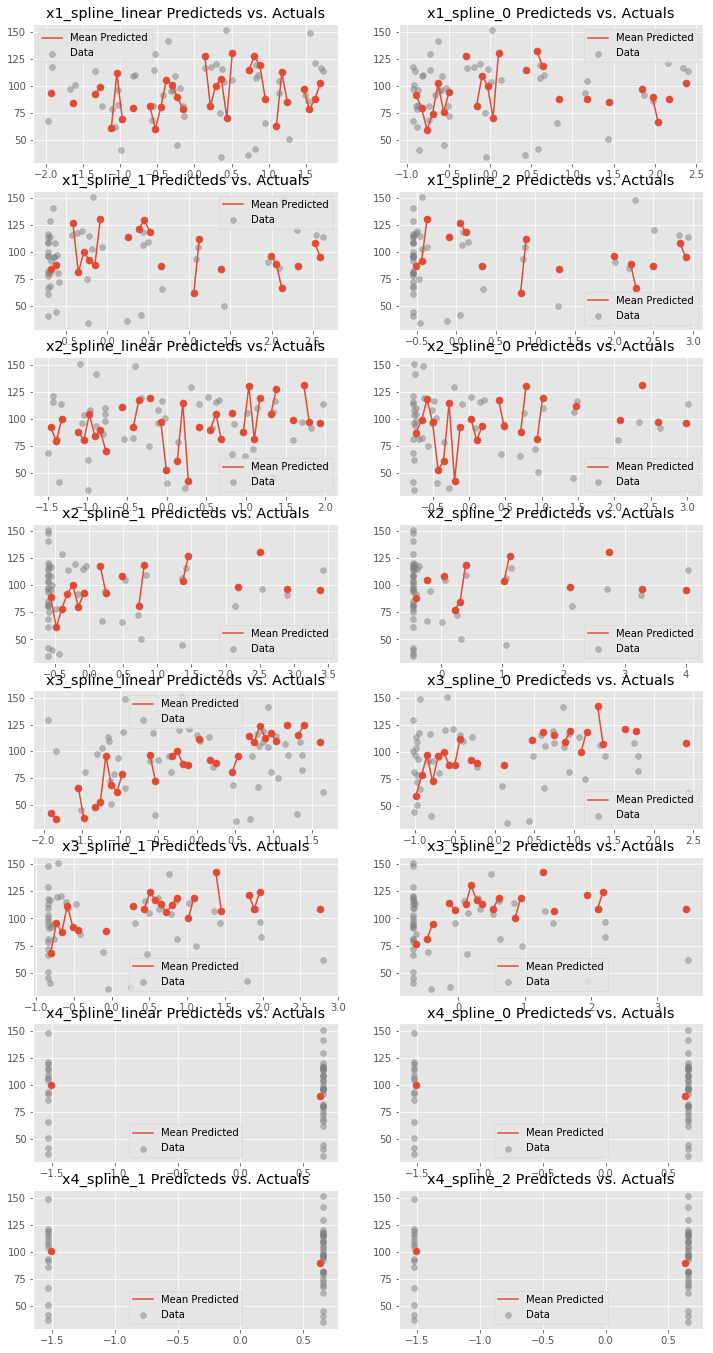

Running: PLOT_RESIDUAL_ERROR ...
PLOT_RESIDUAL_ERROR TIME: 0.005223989486694336


/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:113: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  y.reshape(-1), y_hat_sample.reshape(-1), s=30)


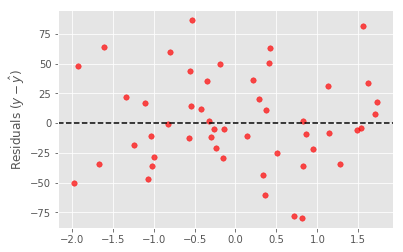

 80%|████████  | 4/5 [00:31<00:07,  7.97s/it]

RF: MSE = 31.879045106513203
Running: CROSS_VAL_SCORE ...
CROSS_VAL_SCORE TIME: 0.269927978515625
GB: mean=-59.481386 std=39.257006
Running: PLOT_PREDICTED_VS_ACTUALS ...
PLOT_PREDICTED_VS_ACTUALS TIME: 0.18651103973388672


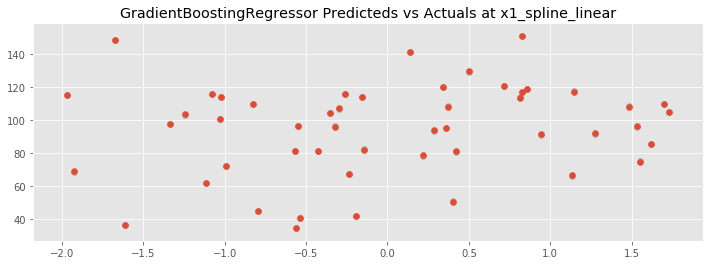

Running: PLOT_FEATURE_IMPORTANCES ...
PLOT_FEATURE_IMPORTANCES TIME: 0.04724574089050293


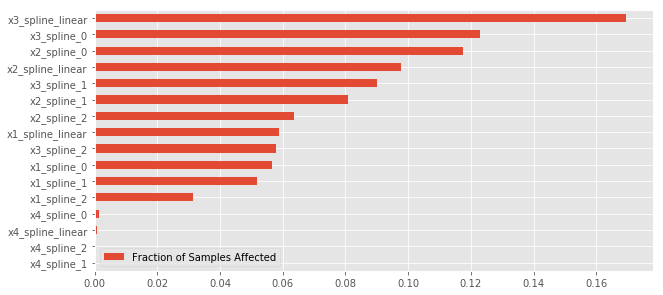

Running: PLOT_PARTIAL_DEPENDENCES ...
PLOT_PARTIAL_DEPENDENCES TIME: 1.567134141921997


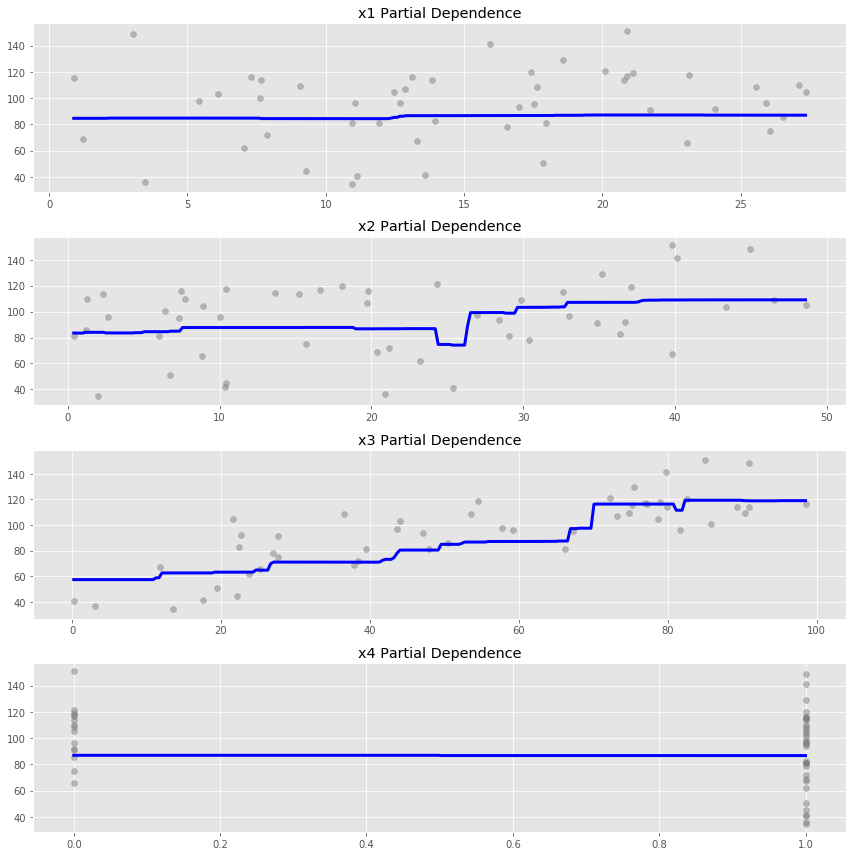

Running: PLOT_MANY_PREDICTEDS_VS_ACTUALS ...
PLOT_MANY_PREDICTEDS_VS_ACTUALS TIME: 0.4639570713043213


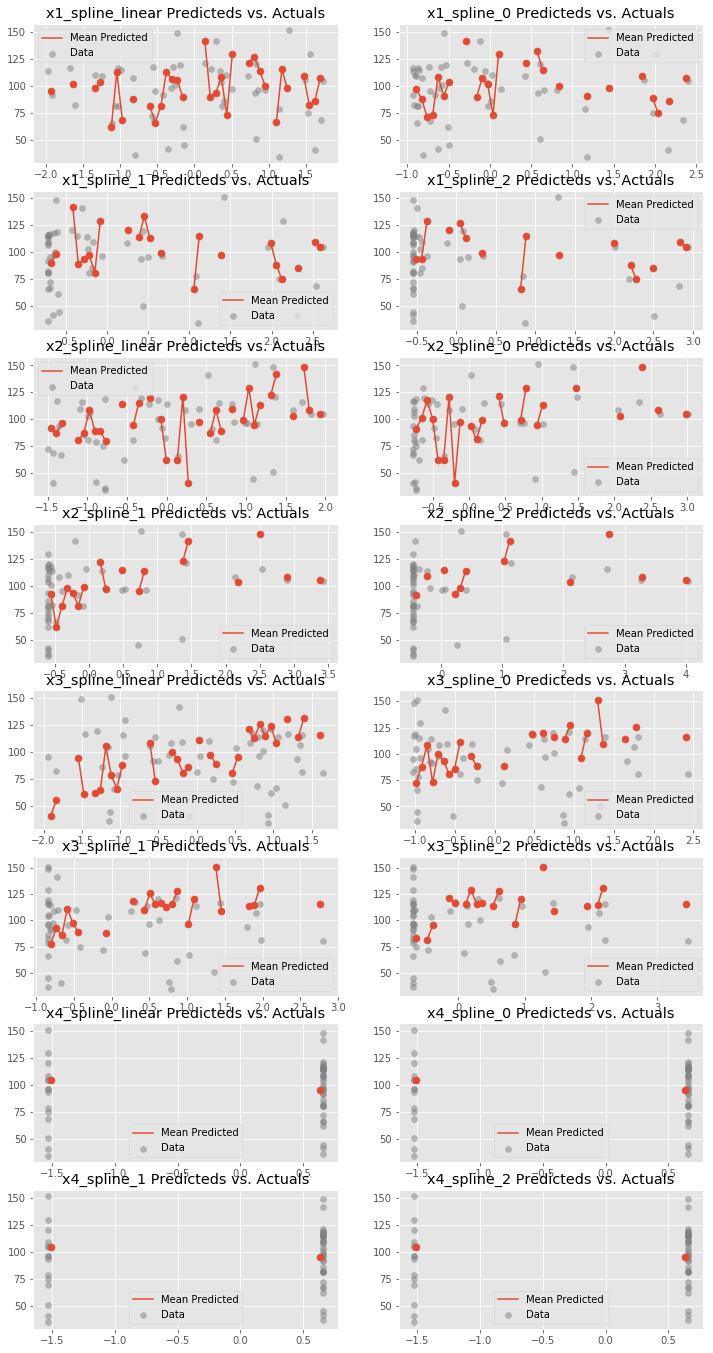

Running: PLOT_RESIDUAL_ERROR ...
PLOT_RESIDUAL_ERROR TIME: 0.00471806526184082


/Users/macbookpro/Dropbox/Galvanize/autoregression/autoregression/autoregression.py:113: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  y.reshape(-1), y_hat_sample.reshape(-1), s=30)


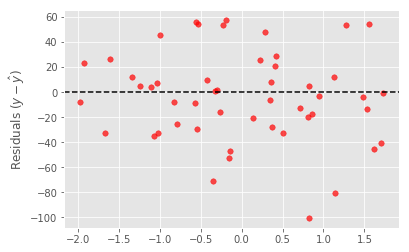

100%|██████████| 5/5 [00:38<00:00,  7.70s/it]


GB: MSE = 68.20478917288041
Running: PLOT_BOX_AND_VIOLINS ...
PLOT_BOX_AND_VIOLINS TIME: 0.25881314277648926


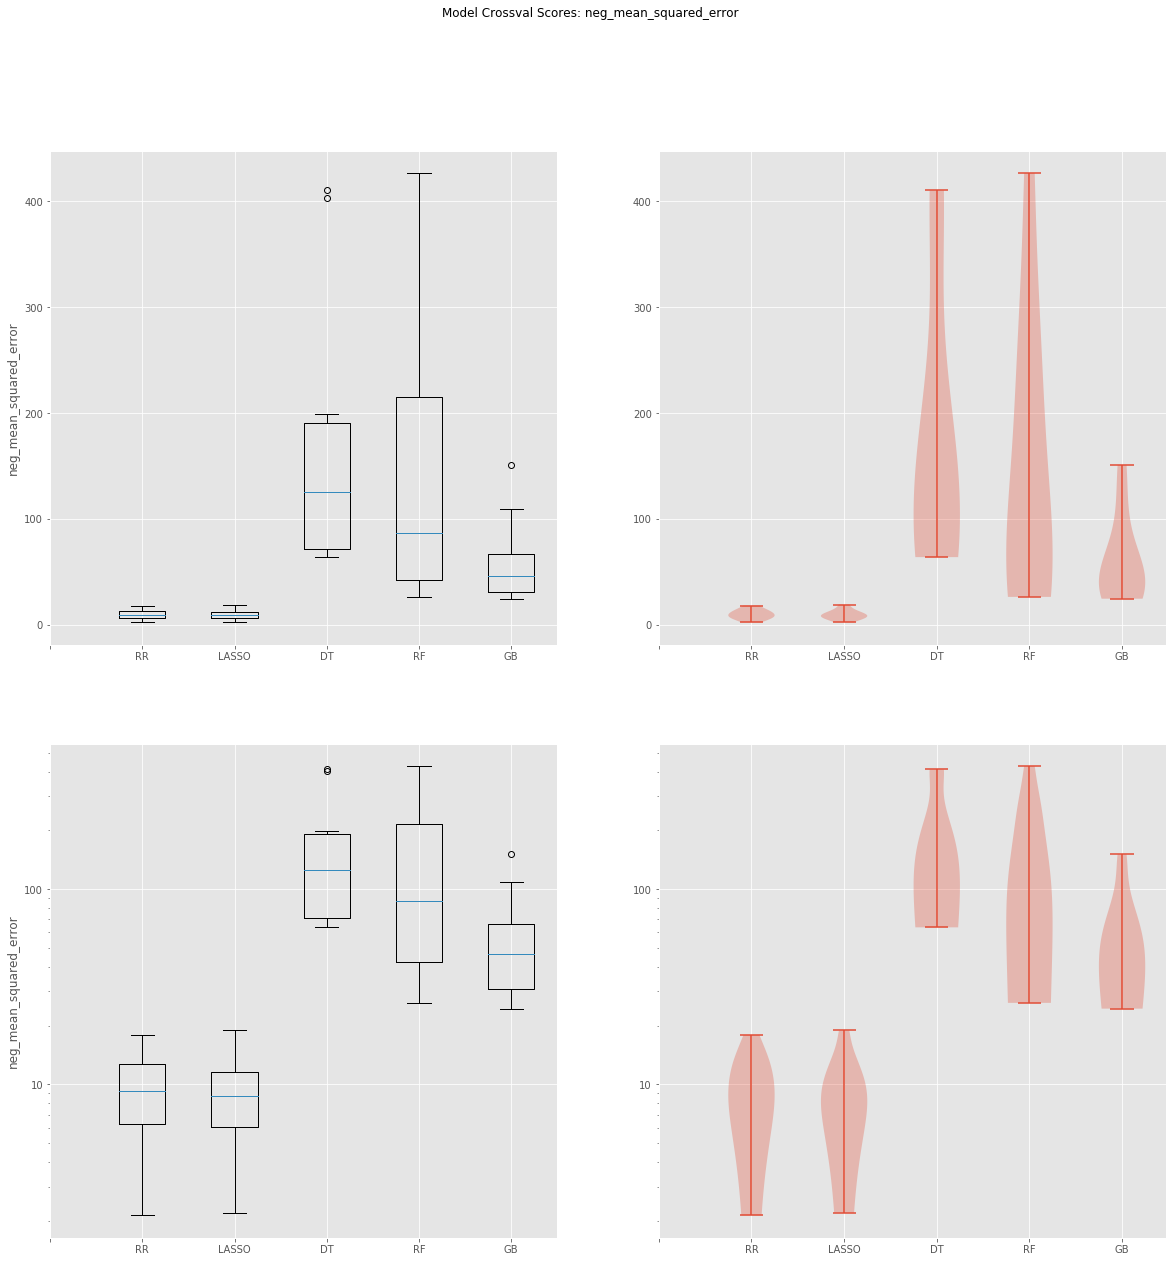

MAKE SUBSAMPLE TIME: 54.1555552482605


In [21]:
import random
# balance_real = pd.read_csv("/Users/macbookpro/Dropbox/Galvanize/dsi-practical-linear-regression/data/balance.csv", index_col=0)
# iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

x1 = np.random.uniform(0,30,50)
x2 = np.random.uniform(0,50,50)
x3 = np.random.uniform(0,100,50)
y = x1 + x2 + x3 + np.random.uniform(0.0, 10, size=len(x1))
data = np.zeros((len(x1),4))
data[:,0] = x1
for i, col in enumerate([x1,x2,x3,y]):
    data[:,i] = col
df = pd.DataFrame(data, columns = ['x1','x2','x3','y'])
df['x4'] = df['x1']< 20
df['x4']=df['x4'].astype('float')
names3, results3, models3, pipeline3, df_X3 = autoregression.compare_predictions(df,'y')

In [22]:
results1

[array([ -91.57147434,  -75.89487561,  -74.11817411,  -72.86593407,
         -77.97266369, -112.86419347, -117.51073141,  -70.75636287,
         -78.70728078,  -83.65420971]),
 array([ -92.79550589,  -76.63623878,  -72.5675595 ,  -72.82564523,
         -77.95924367, -111.64439121, -115.89323594,  -70.66032468,
         -78.34671416,  -84.16501883]),
 array([-143.66233766, -116.44155844, -102.5974026 , -157.68831169,
        -182.7012987 , -197.5974026 , -172.05194805, -136.25974026,
        -126.07894737, -196.86842105]),
 array([ -77.92220779,  -68.14428571,  -89.55727273,  -86.92116883,
         -77.00818182, -120.86584416,  -98.70727273, -112.25649351,
         -71.23671053,  -90.47052632]),
 array([ -81.41226604,  -75.70707518,  -68.40709456,  -76.53960363,
         -80.96349612, -118.08491389, -103.18396227,  -89.02433295,
         -66.68987825,  -80.74246472])]

In [ ]:
is_continuous=True
if not is_continuous:
    print('Not continuosu')

# Machine sales Case study

In [ ]:
def get_age_feature(df, datapoints):
    df = df.head(datapoints);
    df.saledate = pd.to_datetime(df.saledate)
    df.saledate = df.saledate.dt.year
    df['age'] = df.year_made - df.saledate
    df = df.drop('saledate', axis=1)
    df['age_too_old'] = df['age']<-500
    return df
# from 


train_datapoints=100
test_datapoints=60

# GET DATA
df_Train = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/Train.csv')
df_Train = cleandata.rename_columns(df_Train)
df_Train = get_age_feature(df_Train, train_datapoints)
df_Test = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/Test.csv')
df_Test = cleandata.rename_columns(df_Test)
df_Test = get_age_feature(df_Test, test_datapoints)
df_Train.sale_price = np.log(df_Train.sale_price)
df_actual_answers = pd.read_csv('/Users/macbookpro/Dropbox/Galvanize/dsi-regression-case-study/data/do_not_open/test_soln.csv')
df_actual_answers = df_actual_answers[0:test_datapoints];

In [ ]:
df_Train.columns

In [ ]:
df_Train = df_Train[['sales_i_d', 'sale_price', 'machine_i_d', 'model_i_d', 'datasource',
       'auctioneer_i_d', 'year_made', 'machine_hours_current_meter',
       'usage_band', 'differential_type', 'steering_controls', 'age',
       'age_too_old']]

In [ ]:
df_Test = df_Test[['sales_i_d', 'machine_i_d', 'model_i_d', 'datasource',
       'auctioneer_i_d', 'year_made', 'machine_hours_current_meter',
       'usage_band', 'differential_type', 'steering_controls', 'age',
       'age_too_old']]

In [ ]:
def timeit(func, *args):
        start = time.time()
        answers = func(args)
        stop = time.time()
        print(f'{str(func.__name__).upper()} TIME: {stop-start}')
        return answers
timeit(sum, 1, 1)

In [ ]:
namesBIG, resultsBIG, modelsBIG, pipelineBIG, df_XBIG = autoregression.compare_predictions(df=df_Train, y_var_name="sale_price", knots=5, univariates=False, bootstraps=5)

In [ ]:
names4, results4, models4, pipeline4, df_X4 = autoregression.compare_predictions(df=df_Train.head(100), y_var_name="sale_price", knots=5, univariates=True)

# All categorical: true false

In [4]:
df_ar = np.array([['a','b']*600,['a','a','b','c']*300, [True, False, False]*400]).T
df_ar

df= pd.DataFrame(df_ar, columns=['cat1', 'cat2','tf'])
df

cat1 cat2     tf
0       a    a   True
1       b    a  False
2       a    b  False
3       b    c   True
4       a    a  False
5       b    a  False
6       a    b   True
7       b    c  False
8       a    a  False
9       b    a   True
10      a    b  False
11      b    c  False
12      a    a   True
13      b    a  False
14      a    b  False
15      b    c   True
16      a    a  False
17      b    a  False
18      a    b   True
19      b    c  False
20      a    a  False
21      b    a   True
22      a    b  False
23      b    c  False
24      a    a   True
25      b    a  False
26      a    b  False
27      b    c   True
28      a    a  False
29      b    a  False
...   ...  ...    ...
1170    a    b   True
1171    b    c  False
1172    a    a  False
1173    b    a   True
1174    a    b  False
1175    b    c  False
1176    a    a   True
1177    b    a  False
1178    a    b  False
1179    b    c   True
1180    a    a  False
1181    b    a  False
1182    a    b   True
1183    b    c  False
1184    a    a  False
1185    b    a   True
1186    a    b  False
1187    b    c  False
1188    a    a   True
1189    b    a  False
1190    a    b  False
1191    b    c   True
1192    a    a  False
1193    b    a  False
1194    a    b   True
1195    b    c  False
1196    a    a  False
1197    b    a   True
1198    a    b  False
1199    b    c  False

[1200 rows x 3 columns]

In [5]:
names2, results2, models2, pipeline2 = autoregression.compare_predictions(df, 'tf', univariates=False, scatter_matrix=False)

NameError: name 'autoregression' is not defined

In [ ]:
df.corr()

In [ ]:
import matplotlib

In [ ]:
def plot_box_and_violins(names, scoring, results):
    """ Plots two violin plots and box plots for comparison.
        INPUT:
            names:
                a list of regression names, plotted in axis
            scoring:
                string describing scoring method, plotted in title
            results:
                a list of arrays containing CV scores
    """
    fig, ax = plt.subplots(2, 2, figsize=(20, 20))
    ax = ax.flatten()
    fig.suptitle(f'Model Crossval Scores: {scoring}')

    # BOX PLOTS
    ax[0].boxplot(results, vert=True)
    ax[0].set_xticks(list(range(len(names)+1)))
    ax[0].set_xticklabels([''] + names)
    ax[0].set_ylabel(f'{scoring}')

    # VIOLIN PLOTS
    ax[1].violinplot(results, vert=True)
    ax[1].set_xticks(list(range(len(names)+1)))
    ax[1].set_xticklabels([''] + names)

    # BOX PLOTS OF LOG(ERROR)
    ax[2].boxplot(results, vert=True)
    ax[2].set_xticks(list(range(len(names)+1)))
    ax[2].set_xticklabels(['']+names)
    ax[2].set_ylabel(f'{scoring}')
    ax[2].set_yscale('log')
    ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    # VIOLIN PLOTS OF LOG(ERROR)
    ax[3].violinplot(results, vert=True)
    ax[3].set_xticks(list(range(len(names)+1)))
    ax[3].set_xticklabels(['']+names)
    ax[3].set_yscale('log')
    ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plot_box_and_violins(names3, scoring, results3)
plot_box_and_violins(names2, scoring, results2)

In [ ]:
from autoregression import galgraphs

In [ ]:
x1 = np.random.uniform(0,30,50)
x2 = np.random.uniform(0,50,50)
x3 = np.random.uniform(0,100,50)
# x4 = ['a']*50
y = x1 + x2 + x3 + np.random.uniform(0.0, 10, size=len(x1))
data = np.zeros((len(x1),4))
data[:,0] = x1
for i, col in enumerate([x1,x2,x3,y]):
    data[:,i] = col

df = pd.DataFrame(data, columns = ['x1','x2','x3','y'])
df['x4'] = df['x1']< 20
df['x4']=df['x4'].astype('float')
galgraphs.plot_scatter_matrix(df, colors=True)

In [ ]:
data

In [ ]:
df_ar = np.array([['a','b']*600,['a','a','b','c']*300, [True, False, False]*400]).T
df_ar

df= pd.DataFrame(df_ar, columns=['cat1', 'cat2','tf'])
df = list([list(x) for x in df])
galgraphs.plot_scatter_matrix(df)

In [ ]:
models1[2].feature_importances_

In [ ]:
# def plot_feature_importances(model, df_X):
#     if 'feature_importances_' in dir(model):
#         feat_scores = pd.DataFrame({'Fraction of Samples Affected' : model.feature_importances_},
#                                index=df_X.columns)
#         feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
#         feat_scores.plot(kind='barh')
#     else:
#         raise ValueError(f"Model doesn't have feature_importances_, unable to plot\nModel: \n {model} \n ")

In [ ]:
df_X=df.drop('age',axis=1)

In [ ]:
galgraphs.plot_feature_importances(models1[2], pipeline1.transform(df_X))

In [ ]:
ridge_regularization_strengths = np.logspace(np.log10(0.000001), np.log10(100000000), num=100)
ridge_regressions = []
y=df['age']
df_X = df.drop('age', axis=1)
for alpha in ridge_regularization_strengths:
    ridge = Ridge(alpha=alpha)
    ridge.fit(df_X, y)
    ridge_regressions.append(ridge)

In [ ]:
def plot_solution_paths(ax, regressions):
    alphas = [np.log10(ridge.alpha) for ridge in regressions]
    coeffs = np.concatenate([ridge.coef_.reshape(1, -1) 
                             for ridge in regressions])
    for idx in range(coeffs.shape[1]):
        ax.plot(alphas, coeffs[:, idx])
    ax.set_xlabel(r"$\log_{10}(\alpha)$")
    ax.set_ylabel("Estiamted Coefficient")
    ax.set_title("Coefficient Paths")

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
plot_solution_paths(ax, ridge_regressions)

In [ ]:
# results= results2
scoring = 'MSE'

In [ ]:
from autoregression.galgraphs import plot_box_and_violins
plot_box_and_violins(names1, scoring, results1)

In [ ]:
negresults = []
for i, result in enumerate(results):
    negresults.append(-1*result)
    
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.flatten()
fig.suptitle(f'Model Crossval Scores: -{scoring}')
ax[0].set_ylabel(f'{scoring}')

import matplotlib
# BOX PLOTS
ax[0].boxplot(negresults)
ax[0].set_xticklabels(names)


# VIOLIN PLOTS
ax[1].violinplot(negresults)
ax[1].set_xticklabels(names)

#BOX PLOTS OF -LOG(ERROR)
logresults=[] 
ax[2].boxplot(negresults)
ax[2].set_xticklabels(names)
ax[2].set_ylabel(f'-{scoring}')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#VIOLIN PLOTS OF -LOG(ERROR)
logresults=[]
ax[3].violinplot(negresults)
ax[3].set_xticklabels(names)
ax[3].set_ylabel(f'-{scoring}')
ax[3].set_yscale('log')
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.flatten()
fig.suptitle(f'Model Crossval Scores: {scoring}')
ax[0].set_ylabel(f'{scoring}')

# BOX PLOTS
ax[0].boxplot(results)
ax[0].set_xticklabels(names)

# VIOLIN PLOTS
ax[1].violinplot(results)
ax[1].set_xticklabels(names)

#BOX PLOTS OF -LOG(ERROR)
logresults=[] 
ax[2].boxplot(results)
ax[2].set_xticklabels(names)
ax[2].set_ylabel(f'{scoring}')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#VIOLIN PLOTS OF -LOG(ERROR)
logresults=[]
ax[3].violinplot(results, vert=False)
ax[3].set_yticklabels(names)
ax[3].set_xlabel(f'-{scoring}')
ax[3].set_xscale('log')
ax[3].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()

In [ ]:
# def plot_roc(model, df_X, y, pipeline=None):
#     # calculate the fpr and tpr for all thresholds of the classification
#     if pipeline:
#         probs = model.predict_proba(pipeline.transform(df_X))
#     else:
#         probs = model.predict_proba(df_X)
#     preds = probs[:,1]
#     fpr, tpr, threshold = roc_curve(y, preds)
#     roc_auc = auc(fpr, tpr)
    
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()

# make_roc(df_X=df.drop('class', axis=1), y=df['class'], model=models2[0][1], pipeline=pipeline2)

# def plot_rocs(models, df_X, y, pipeline=None):
#     fig, ax = plt.subplots(1,1)
#     for model in models:
#          galgraphs.plot_roc(ax, model, df_X, y, pipeline)
galgraphs.plot_rocs(models2, df_X=df.drop('y', axis=1), y=df['y'], pipeline=pipeline2)

In [ ]:
from autoregression import galgraphs

In [ ]:
df